<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Marketing Campaign Analysis & Clustering</p>

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
import numpy as np

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Initial Exploration</p>

**Let's take a look at our Data**

<ul>
  <li><b>AcceptedCmp1</b> - 1 if customer accepted the offer in the 1st campaign, 0 otherwise</li>
    <li><b>AcceptedCmp2</b> - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise</li>
    <li><b>AcceptedCmp3</b> - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise</li>
    <li><b>AcceptedCmp4</b> - 1 if customer accepted the offer in the 4th campaign, 0 otherwise</li>
    <li><b>AcceptedCmp5</b> - 1 if customer accepted the offer in the 5th campaign, 0 otherwise</li>
    <li><b>Response (target)</b> - 1 if customer accepted the offer in the last campaign, 0 otherwise</li>
    <li><b>Complain -</b> 1 if customer complained in the last 2 years</li>
    <li><b>DtCustomer</b> - date of customer's enrollment with the company</li>
    <li><b>Education</b> - customer's level of education</li>
    <li><b>Marital</b> - customer's marital status</li>
  <li><b>Kidhome</b> - number of small children in customer's household</li>
  <li><b>Teenhome</b> - number of teenagers in customer's household</li>
  <li><b>Income</b> - customer's yearly household income</li>
  <li><b>MntFishProducts</b> - amount spent on fish products in the last 2 years</li>
  <li><b>MntMeatProducts</b> - amount spent on meat products in the last 2 years</li>
  <li><b>MntFruits</b> - amount spent on fruits products in the last 2 years</li>
  <li><b>MntSweetProducts</b> - amount spent on sweet products in the last 2 years</li>
  <li><b>MntWines</b> - amount spent on wines products in the last 2 years</li>
  <li><b>MntGoldProds</b> - amount spent on gold products in the last 2 years</li>
  <li><b>NumDealsPurchases</b> - number of purchases made with discount</li>
  <li><b>NunCatalogPurchases</b> - number of purchases made using catalog</li>
  <li><b>NunStorePurchases</b> - number of purchases made directly in stores</li>
  <li><b>NumWebPurchases</b> - number of purchases made through company's web site</li>
  <li><b>NumWebVisitsMonth</b> - number of visits to company's web site in the last month</li>
  <li><b>Recency</b> - number of days since the last purchase</li>
</ul>

In [2]:
df = pd.read_csv('ml_project1_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


<style>
.rendered_html{
    background-color: gray !important;
}
</style>


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preparation</p>

**Let's correct the data type of the column Dt_Customer**

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

**Let's check the Null Values**

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**How much this Null values represent of our data?**

In [7]:
print((df[df['Income'].isnull()].shape[0] / df.shape[0] ) * 100)

1.0714285714285714


In [8]:
#Let's taka a further look at this columns
pd.set_option('display.max_columns', None)
df[df.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


**Let's fill the Null values based on the customer's Education level**

In [9]:
#Calculate the median of each Education level.
average_income = df.groupby('Education')['Income'].median()

# Shows the Result
print(average_income)

Education
2n Cycle      46805.0
Basic         20744.0
Graduation    52028.5
Master        50943.0
PhD           55212.0
Name: Income, dtype: float64


In [10]:
# fill missing values with median income for each education level
df['Income'] = df.apply(lambda x: average_income[x['Education']] if pd.isnull(x['Income']) else x['Income'], axis=1)


**Let's check how many unique values we have in each column**

In [11]:
# Unique values of each column
for col in df:
    print(f"Number of unique values of '{col}': {df[col].nunique()}")
    print('-' * 60)

Number of unique values of 'ID': 2240
------------------------------------------------------------
Number of unique values of 'Year_Birth': 59
------------------------------------------------------------
Number of unique values of 'Education': 5
------------------------------------------------------------
Number of unique values of 'Marital_Status': 8
------------------------------------------------------------
Number of unique values of 'Income': 1976
------------------------------------------------------------
Number of unique values of 'Kidhome': 3
------------------------------------------------------------
Number of unique values of 'Teenhome': 3
------------------------------------------------------------
Number of unique values of 'Dt_Customer': 663
------------------------------------------------------------
Number of unique values of 'Recency': 100
------------------------------------------------------------
Number of unique values of 'MntWines': 776
--------------------------

**As our MetaData does not give information about the columns Z_CostContact and Z_Revenue, and both columns have a single unique value Let's drop them off**

In [12]:
df = df.drop(['ID','Z_CostContact','Z_Revenue'], axis=1)

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Data Analysis</p>

In [13]:
#Lets separate our variables in numericals and caregoricals. 

nums = ['Year_Birth','Income','Recency','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

cate = ['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain','Response']

len(nums)+len(cate) == len(df.columns)

False

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

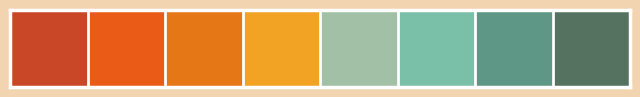

In [14]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#f2d4b1","figure.facecolor":"#f2d4b1","grid.color":"white"})
sns.set_context("poster",font_scale = .5)

palette = ["#c94727","#ea5b17","#e57716","#f2a324","#a2c0a6","#7ac0a8","#5e9786","#557260"]

sns.palplot(sns.color_palette(palette))
plt.show()

In [15]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52242.594866,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25039.061738,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51498.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Treating outliers**

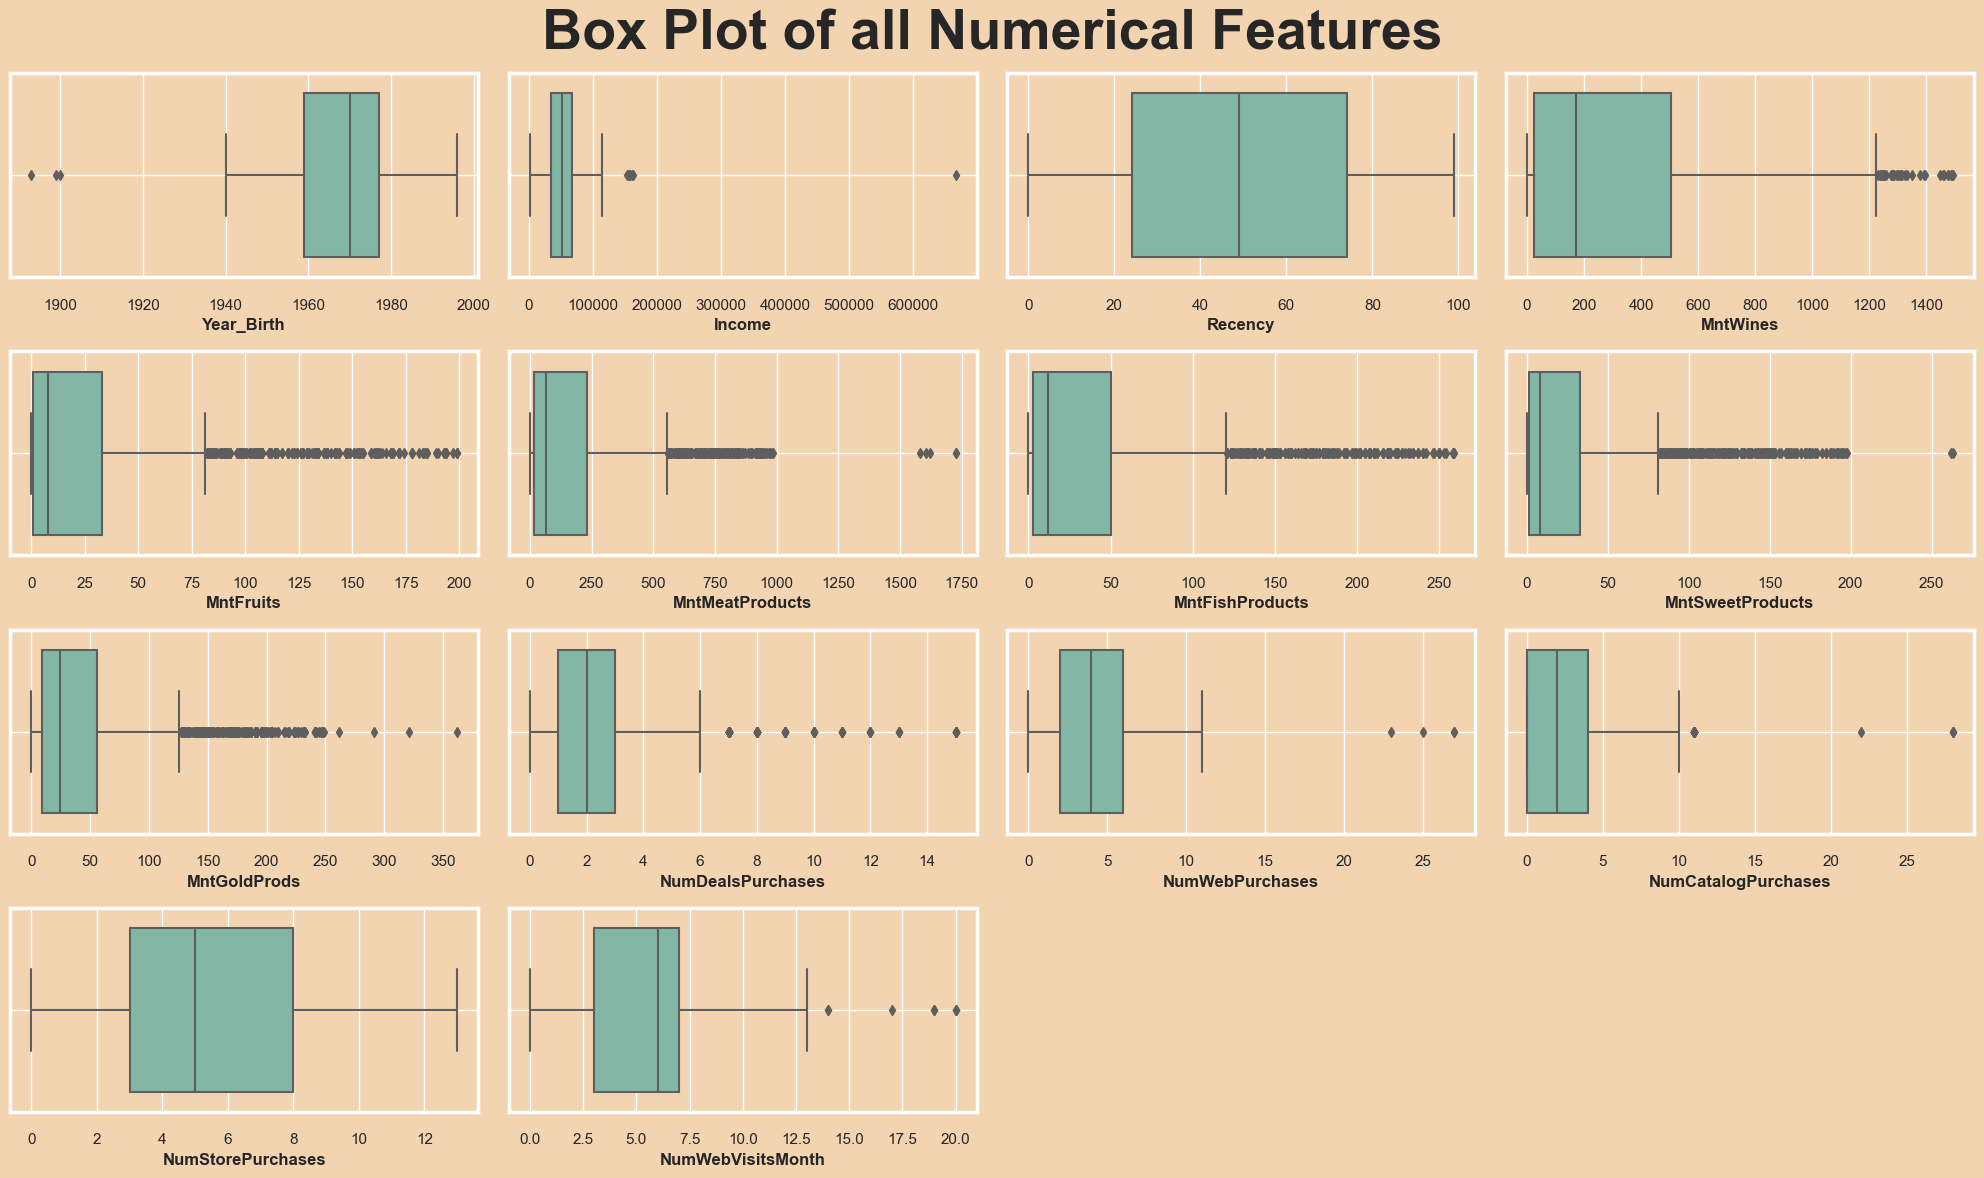

In [16]:
features = nums

# Plotagem.
plt.figure(figsize=(20, 12))
plt.suptitle('Box Plot of all Numerical Features', fontsize=40, fontweight='bold')

for i in range(0, len(nums)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x = df[features[i]], color = palette[5], linewidth=1.5)
    plt.xlabel(features[i], fontweight='bold')
    plt.grid(linewidth=1)
    plt.tight_layout()

**Let's treat some outliers**

<b>Income</b>: Very high values. As we have a normal distribution, we will keep 3 standard deviations.

<b>Year_birth</b>: Very low values. We will use 100 years as the maximum age.

In [17]:
#Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df.loc[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

df.drop(outliers.index, inplace = True)

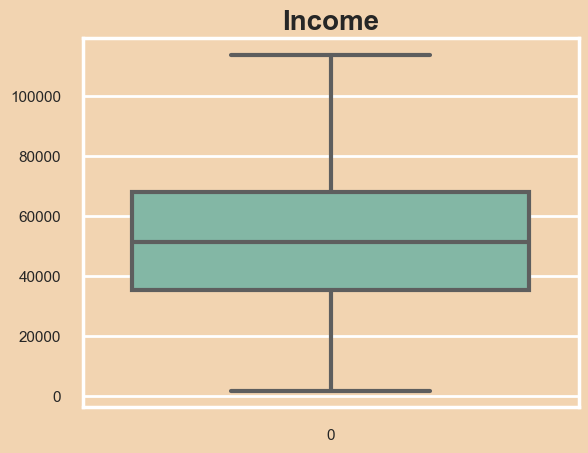

In [18]:
sns.boxplot(df['Income'], color=palette[5],)
plt.title('Income', fontsize=20, fontweight='bold')
plt.show()

In [19]:
#Year column

df[df['Year_Birth'] < 1922]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


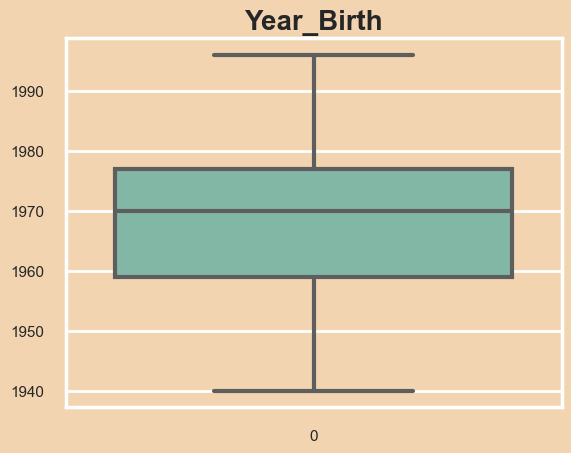

In [20]:
# Let's drop these lines as it seems to be a result of a misstypo.
df.drop([239, 192, 339], axis = 0, inplace= True)

sns.boxplot(df['Year_Birth'], color=palette[5])
plt.title('Year_Birth',fontsize=20, fontweight='bold')
plt.show()

**Let's take a look at our numerical features distributions**

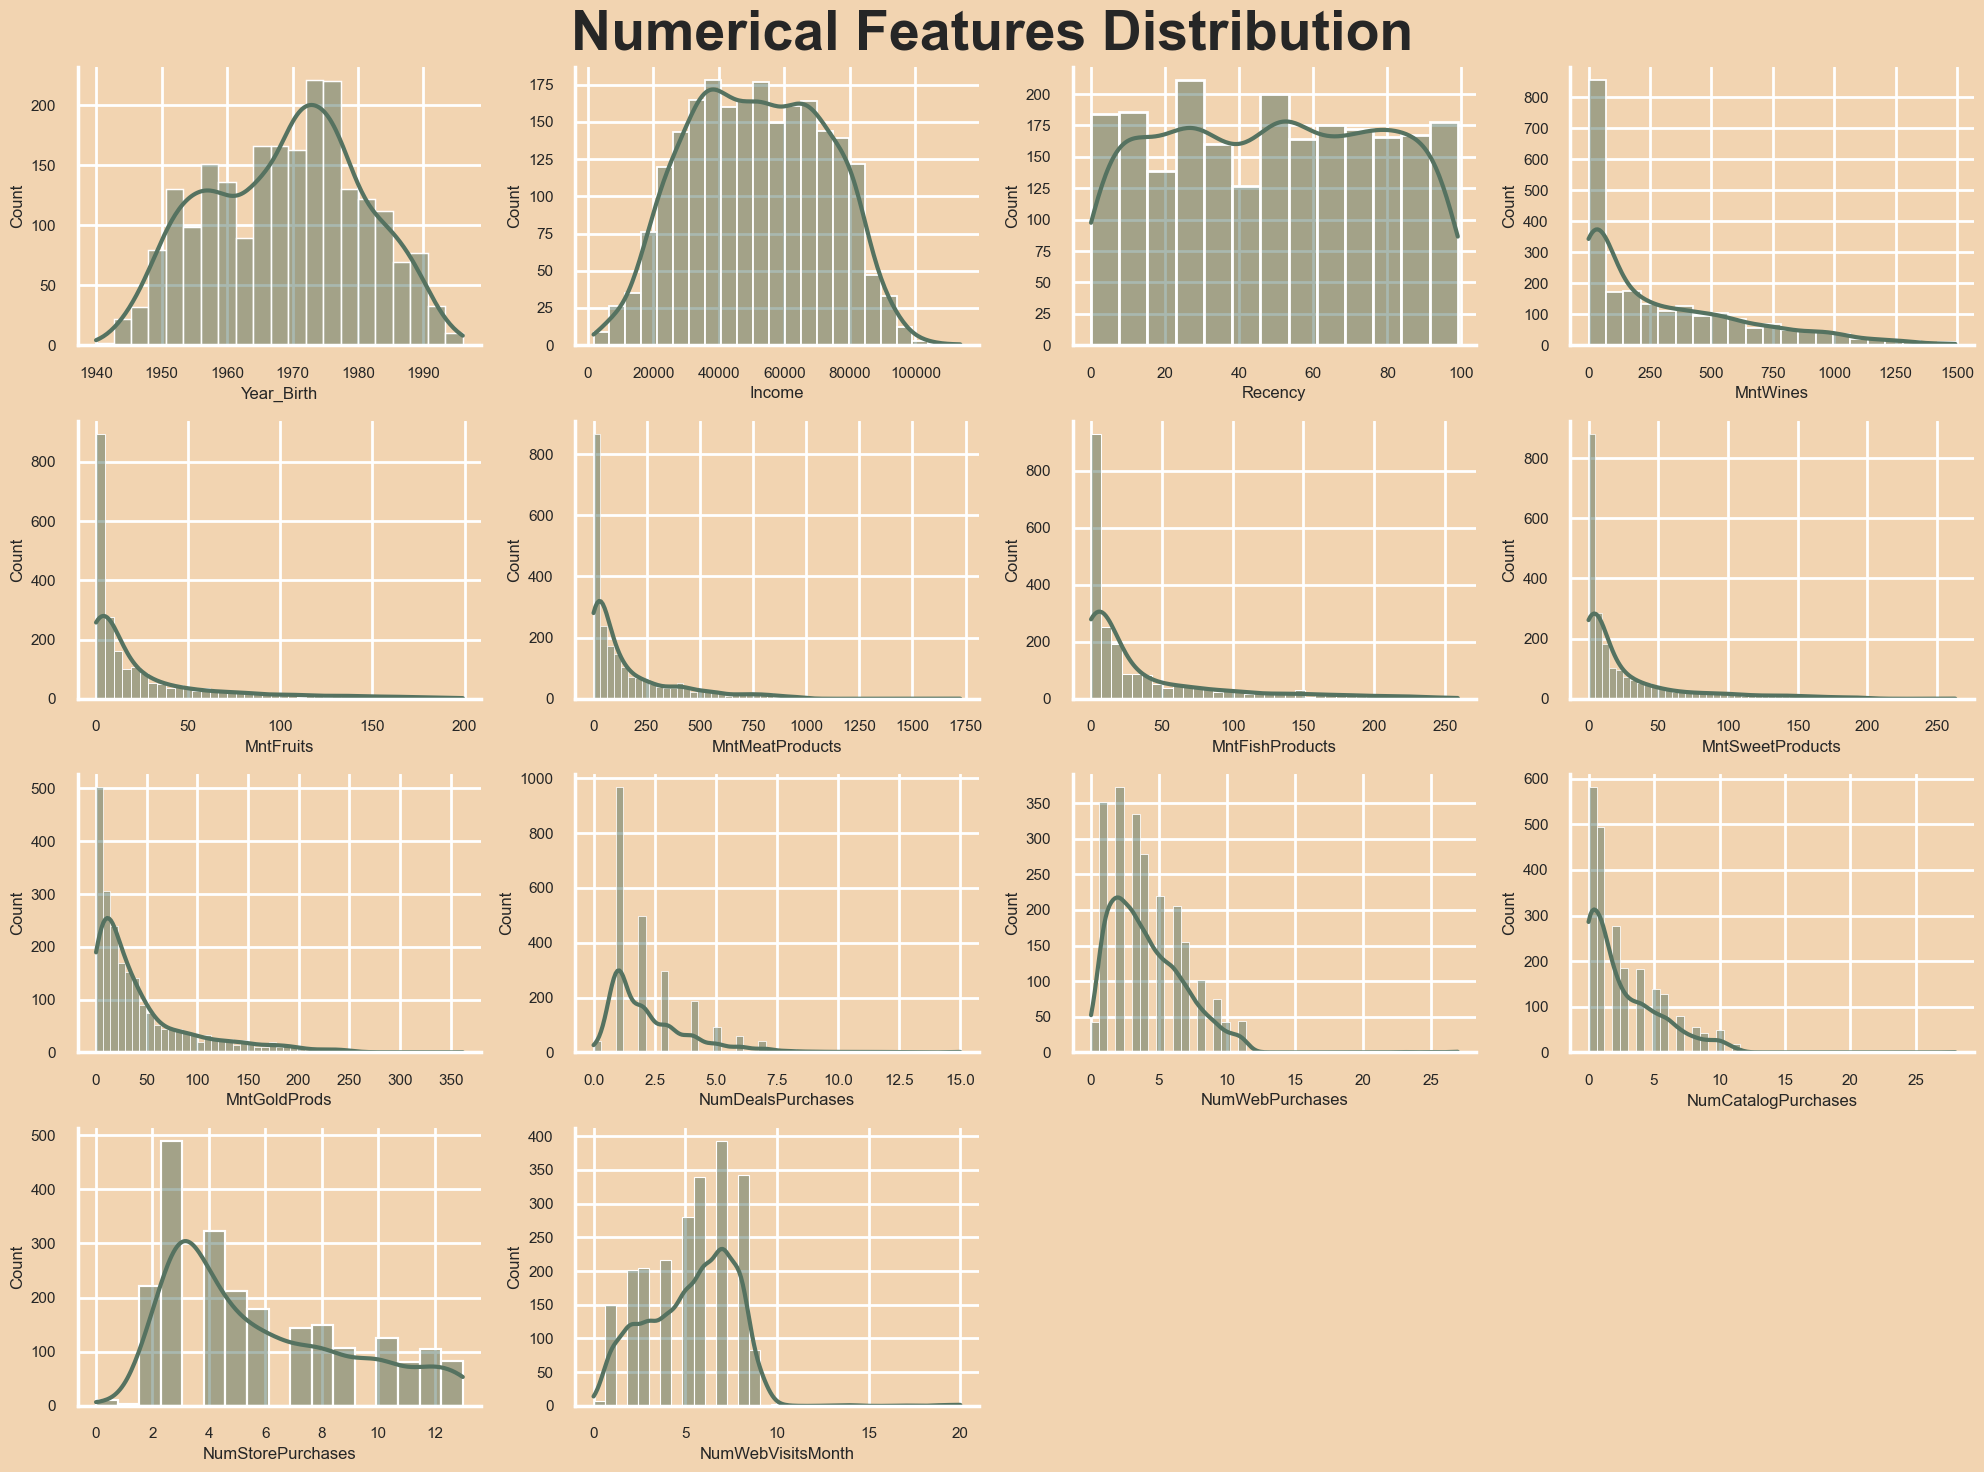

In [21]:
features = nums

# Plotagem.
plt.figure(figsize=(20, 15))
plt.suptitle('Numerical Features Distribution',fontsize=40, fontweight='bold')

for i in range(0, len(nums)):
    plt.subplot(4, 4, i + 1)
    sns.histplot(x = df[features[i]], color = palette[7], kde=True)
    sns.despine() 
    plt.xlabel(features[i])
    plt.tight_layout()

**Let's zoom in our products distribution as some interisting insights can be taken from the above overview**

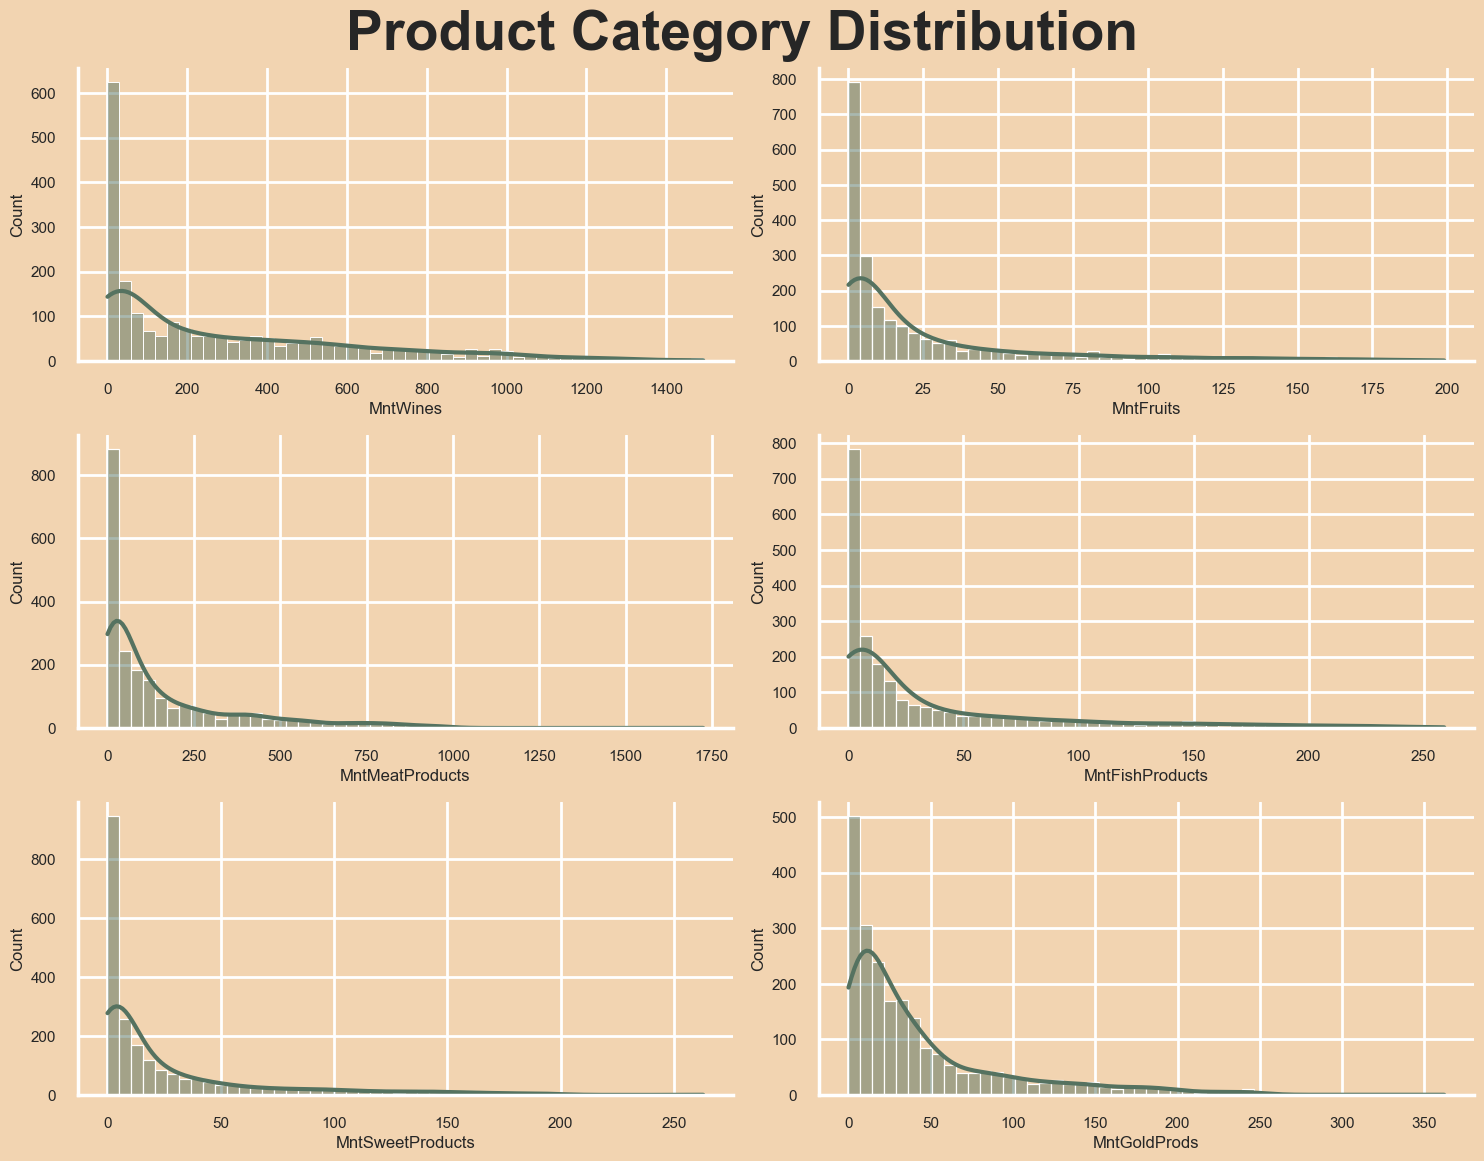

In [22]:
products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

plt.figure(figsize=(15, 15))
plt.suptitle('Product Category Distribution', fontsize=40, fontweight='bold')

for i in range(0, len(products)):
    plt.subplot(4, 2, i + 1)
    sns.histplot(x = df[products[i]], color = palette[7], bins=50, kde=True)
    sns.despine() 
    plt.xlabel(products[i])
    plt.tight_layout()

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Insights</p>

These plots shows us interesting things:
<ul>
    <li>All of our products have a similar right-skewed distribution, which leads us to think that there is a long room for the company to increase sales in each product category.</li>
    <li>As the count of costumer who spend 50 or less is very close for each category, it can means thst this is a group of customers that are not spending to much and we need to investigate this to ensure that is a customer profile and try to come up something to increase their activities. </li>
    
</ul>
We will talk about this later...

Keep in mind that our goal is to grew the company's promotion acceptance rate

**Let's check if is there any correlation between the products category**

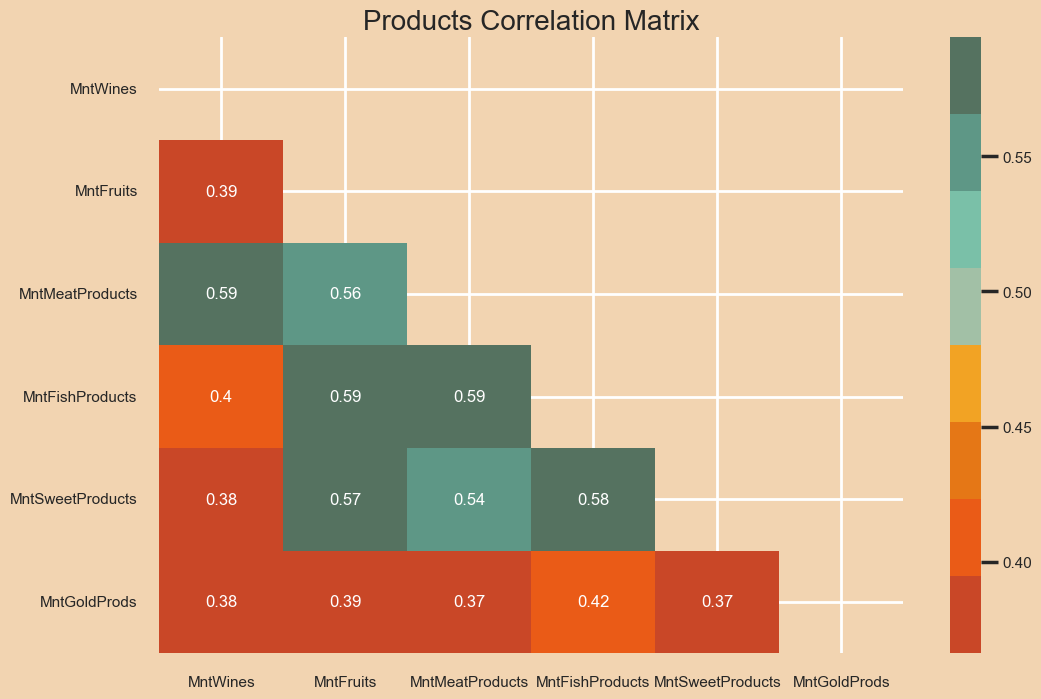

In [23]:
corr_matrix = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']].corr()

#Mask to hide one half of the correlation matrix.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=palette)
plt.title('Products Correlation Matrix', fontsize=20)

# Exiba o gráfico
plt.show()

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Insights</p>

Medium to High Correlations:

<ul>
    <li><b>Wines & MeatProducts<b/></li>
    <li><b>Fruits & MeatProducts<b/></li>
    <li><b>Fruits & FishProducts<b/></li>
    <li><b>Fruits & SweetProducts<b/></li>
    <li><b>MeatProducts & SweetProducts<b/></li>
    <li><b>MeatProducts & FishProducts<b/></li>
        
</ul>

Here we can see a medium to high correlation between wines and meat products, which can gives insights to the company to build strategies in how to create promotion campaigns and link this procuts aiming to incrise the revenue.

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Engineering</p>


<b>Age</b> : Customer's Age.

<b>Education_lvl</b> : Group education levels into High, Medium, and Low.

<b>Total_spent</b> : Total amount spent per customer.

<b>Acc_age</b> : We will create this column to know how long the customer has had their account.

<b>Marital_Status_grouped</b> : Group marital status as singles, couples, and widows.

<b>Age group</b> : Group age range of consumers.

<b>Total_campaignAcc</b> : Total campaign accepted per costumer.

<b>Number of purchase</b> : Total purchase done by the costumer. 


**Creating the Age Column**

In [24]:
df['Age'] = df['Year_Birth'].apply(lambda x : 2020 - x)

**Creating the Education_lvl Column**

In [25]:
df['Education'].unique()
df['Education'].value_counts()

Graduation    1124
PhD            481
Master         369
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [26]:
#Lets create a education lvl column classifying as High, Medium and low level of education.
Education_lvl = []

for item in df['Education']:
    if item == 'Graduation':
        Education_lvl.append('Medium')
    elif item == '2n Cycle':
        Education_lvl.append('Medium')
    elif item == 'PhD':
        Education_lvl.append('High')
    elif item == 'Master':
        Education_lvl.append('High')
    else:
        Education_lvl.append('Low')

df['Education_lvl'] = Education_lvl

**Creating the Total Amount Spent Column**

In [27]:
#Lets create a colum with the total amount spent

df['Total_spent'] = df[['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)


**Creating the Acc_Age Column**

In [28]:
data = pd.to_datetime('2022-12-31')

df['Acc_Age'] = ((data - df['Dt_Customer']) / pd.Timedelta(days=365.25)).round()

**Creating the Column Marital_Status_unified Column**

In [29]:
# Treating the Marital_Status
# Alone  marital status changed to Single
# YOLO  marital status changed to Single

df.loc[df['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'

#As the string value does not give us idea of the correct Marital status, so lets drop it.
df[df['Marital_Status'] == 'Absurd']
df.drop([2093,2134], axis = 0, inplace=True)

unified = []

for item in df['Marital_Status']:
    if item =='Together':
        unified.append('Couple')
    elif item == 'Married':
        unified.append('Couple')
    else:
        unified.append(item)

df['Marital_Status_unified'] = unified

**Creating the NumOfPurchases Column**

In [30]:
# Number of purchase disconsidering the channel. 
df['NumOfPurchases'] = df[['NumCatalogPurchases','NumWebPurchases','NumStorePurchases']].sum(axis=1)

**Creating the Age_group column**

In [31]:
faixa_etaria = []

for item in df['Age']:
    if item <= 12:
        faixa_etaria.append('child')
    elif item > 12 and item <= 18:
        faixa_etaria.append('teenager')
    elif item > 19 and item <= 39:
        faixa_etaria.append('young_adults')
    elif item > 40 and item <= 59:
        faixa_etaria.append('medium_age')
    else:
        faixa_etaria.append('elderly')
        
df['Age_group'] = faixa_etaria

**Creating the Total_CampaignAcc column**

In [32]:
df['Total_campaignAcc'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum(axis=1)


**Let's Check these new distribution to understand o Customers' profile**


<Axes: xlabel='Education_lvl', ylabel='Count'>

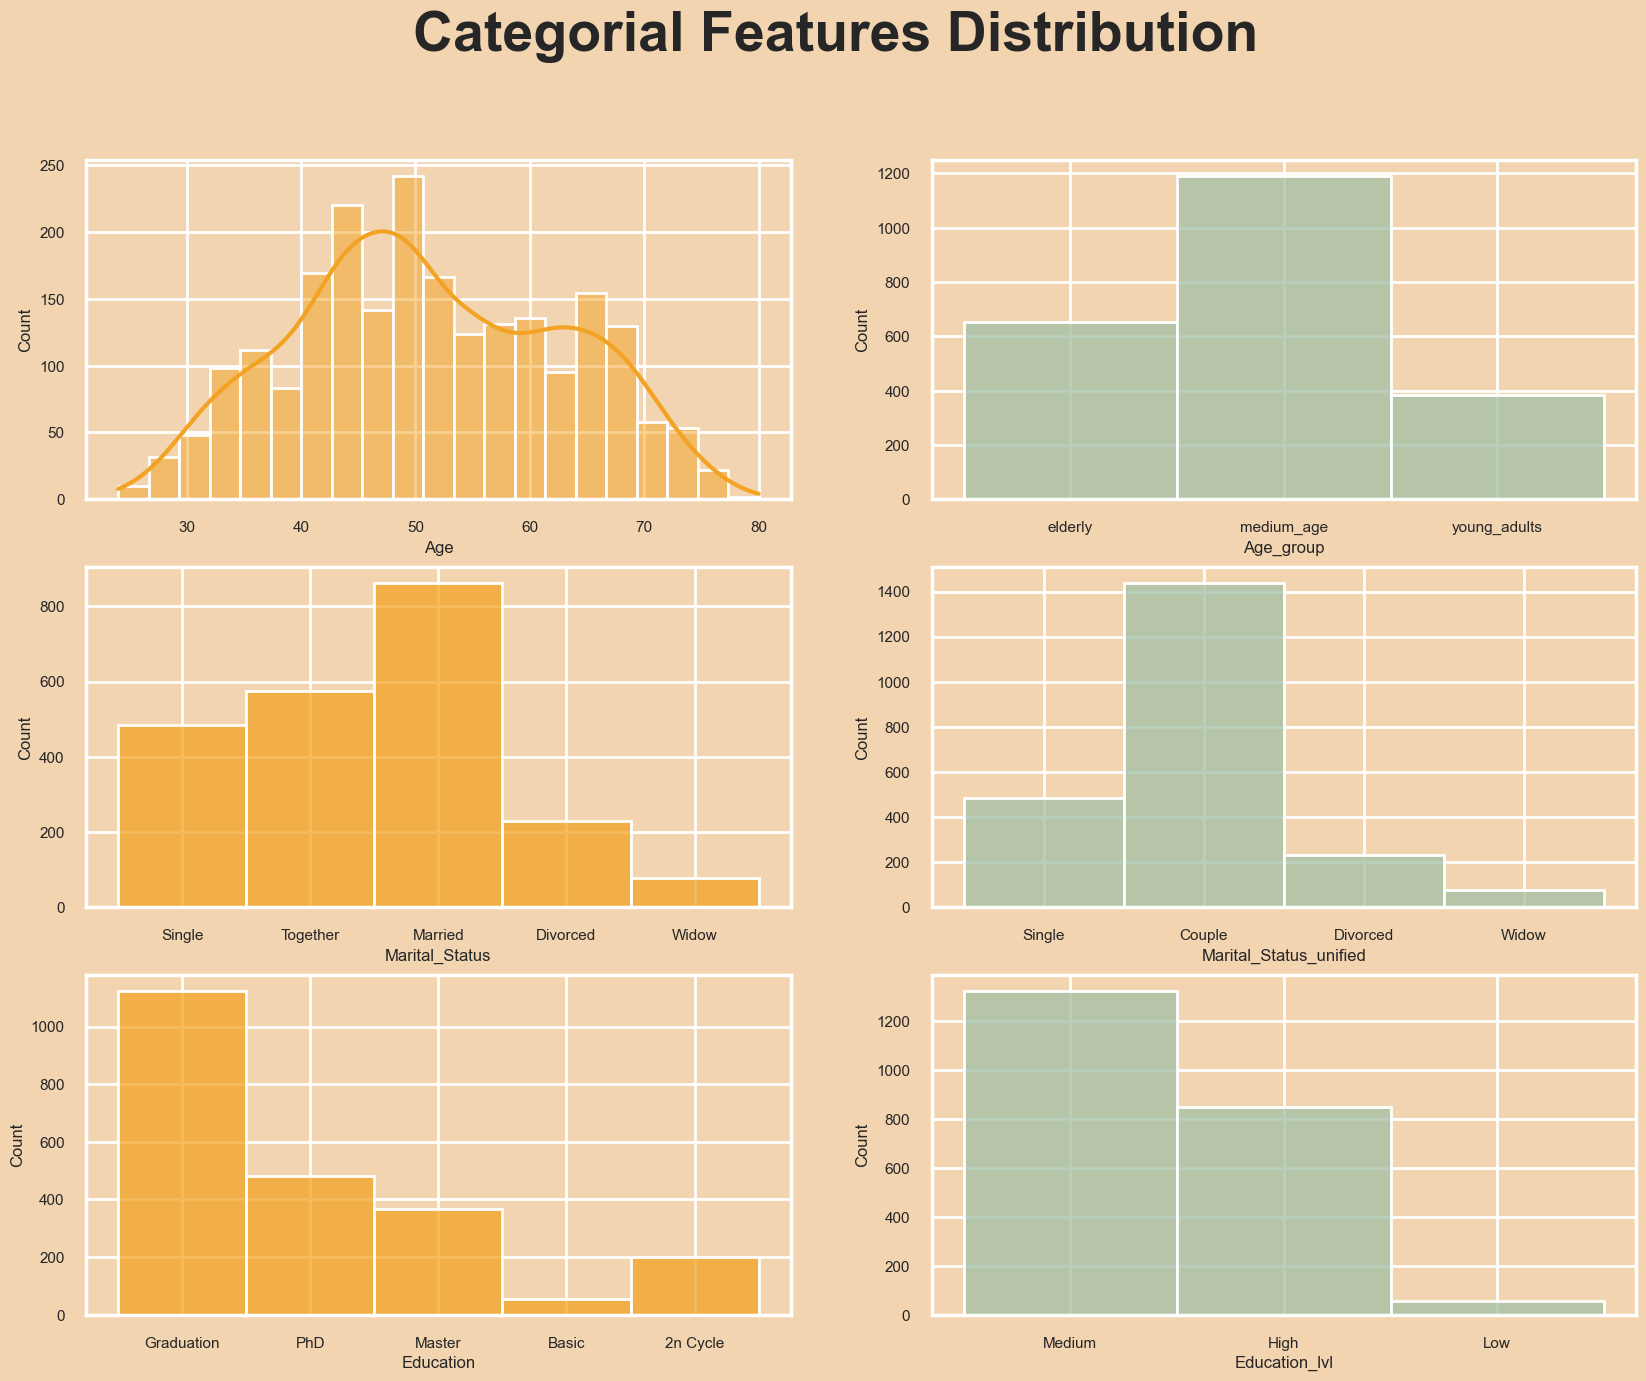

In [33]:
fig,ax = plt.subplots(3,2,figsize=(20,15))
plt.suptitle('Categorial Features Distribution', fontsize=40, fontweight='bold')

sns.histplot(data=df, x="Age" ,ax=ax[0,0], color=palette[3],kde=True)
sns.histplot(data=df, x="Age_group" ,ax=ax[0,1], color=palette[4])
sns.histplot(data=df, x="Marital_Status" ,ax=ax[1,0], color=palette[3])
sns.histplot(data=df, x="Marital_Status_unified" ,ax=ax[1,1], color=palette[4])
sns.histplot(data=df, x="Education" ,ax=ax[2,0], color=palette[3])
sns.histplot(data=df, x="Education_lvl" ,ax=ax[2,1], color=palette[4])

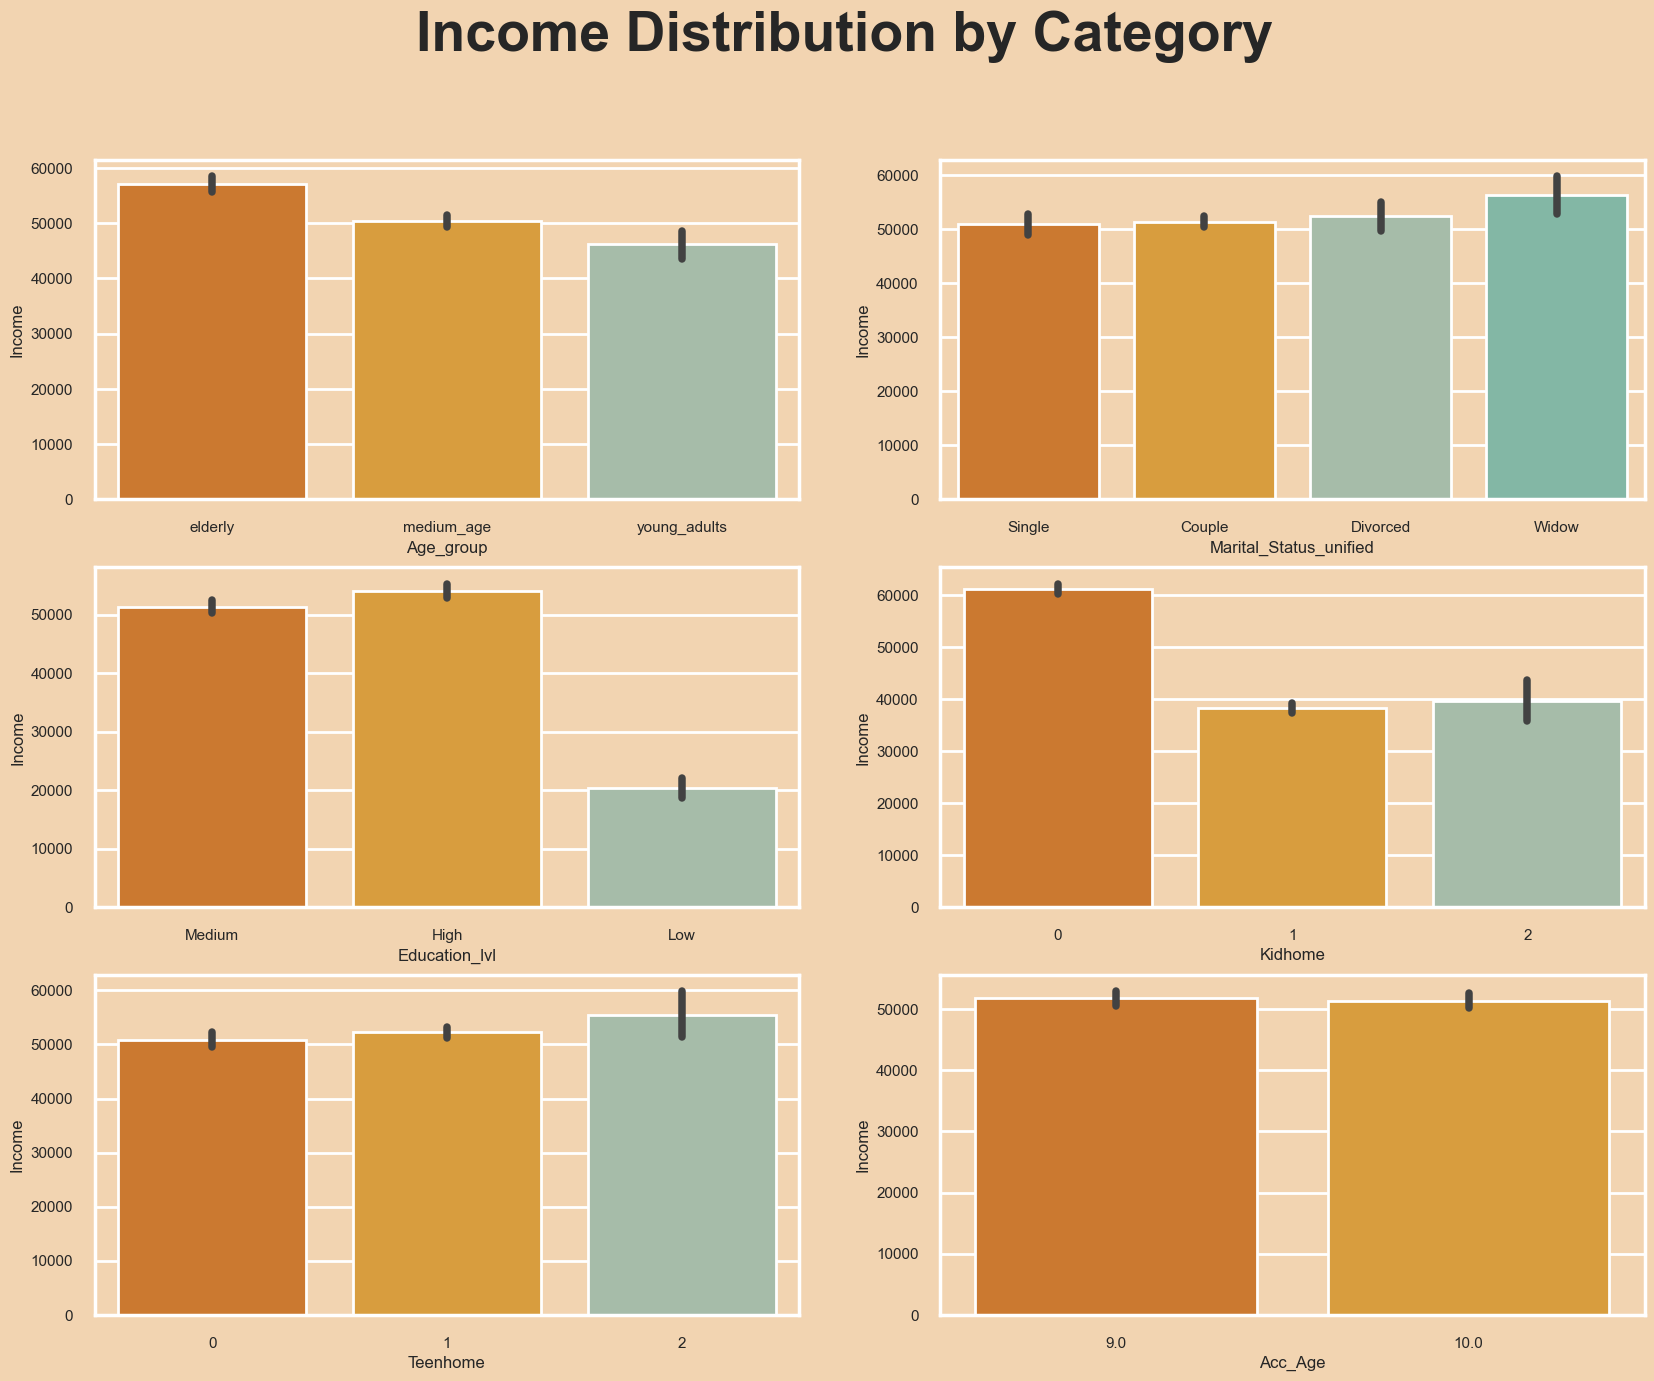

In [34]:
# Criar lista com os nomes das variáveis
variables = ["Age_group", "Marital_Status_unified", "Education_lvl", "Kidhome", "Teenhome", 'Acc_Age']

# Loop para plotar gráficos para cada variável
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Income Distribution by Category', fontsize=40, fontweight='bold')
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.barplot(data=df, x=var, y="Income", ax=ax[row, col], palette=palette[2:])

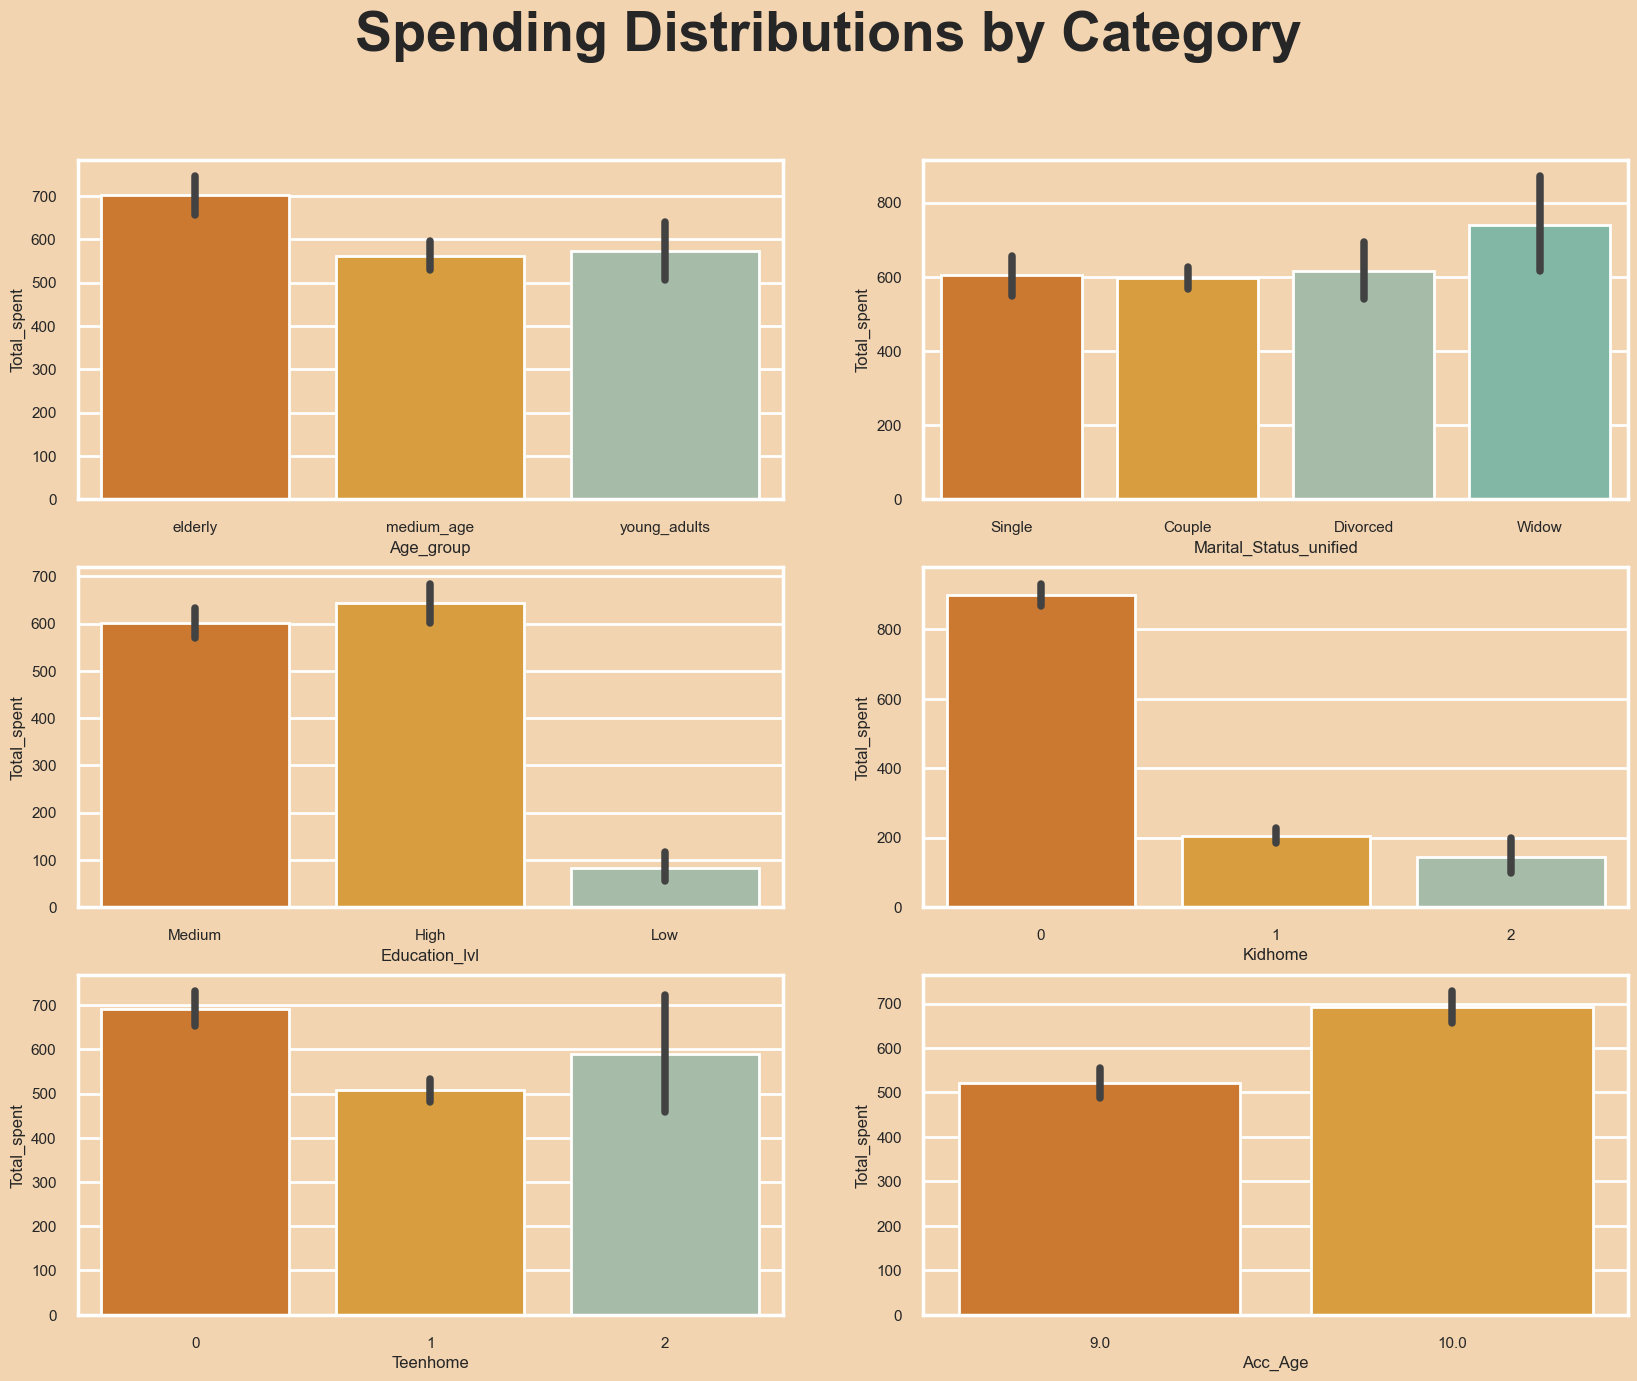

In [35]:
# Criar lista com os nomes das variáveis
variables = ["Age_group", "Marital_Status_unified", "Education_lvl", "Kidhome", "Teenhome", 'Acc_Age']

# Loop para plotar gráficos para cada variável
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Spending Distributions by Category', fontsize=40, fontweight='bold')
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.barplot(data=df, x=var, y="Total_spent", ax=ax[row, col], palette=palette[2:])

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Insights</p>

**Customer Profile**
<ul>
<li>Age Group: The database is composed mostly of middle-aged adults, followed by the elderly and young adults.</li>

<li>Marital Status: The database is composed mostly of couples.</li>

<li>Education Level: The database is composed mostly of individuals with a high education level.</li>

</ul>

**Income Profile**

The average salary does not vary much among different age groups, marital status, and individuals with or without teenage children. However, this does not apply to customers with young children at home, who tend to earn more.

**Spending Profile**

The average spending of our customers does not vary much among different age groups, marital status, and individuals with teenage children. However, customers with young children tend to spend less, while customers with a higher education level tend to spend more.

From the insights above, it can be observed that categorical variables mainly help us understand our customer profiles, except for the fact that customers with young children tend to spend less on average.

**Question 1**

**Is the Income related to the Education Lvl?**

Text(0.5, 1.0, 'Income Per Education Level')

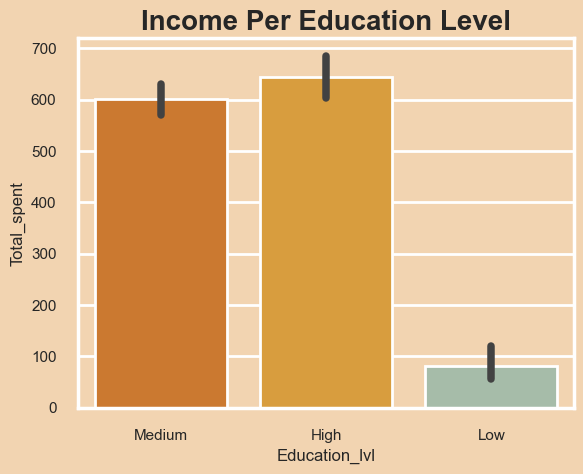

In [36]:
sns.barplot(data=df, x='Education_lvl', y="Total_spent", palette=palette[2:])
plt.title('Income Per Education Level', fontsize=20, fontweight='bold')

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Insights</p>

As we can see, individuals with a higher level of education tend to make more money. However, the discrepancy between customers who have a high level of education, such as a PhD, and those with a medium level of education is not as large as expected.

**Question 4**

Where do our customers spend the most, and which channel?

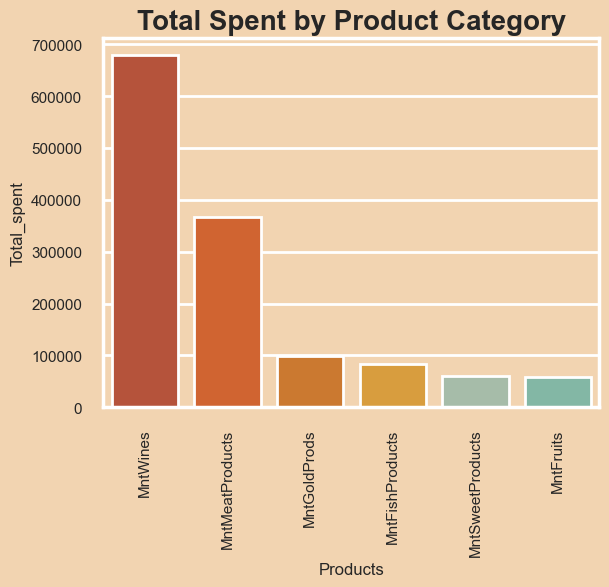

In [37]:
products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
dic= {}

for items in products:
    dic[items] = df[items].sum()

df2 = pd.DataFrame.from_dict(dic, orient='Index').reset_index()

df2.columns = ['Products','Total_spent']

sns.barplot(data=df2.sort_values(by='Total_spent', ascending= False), x='Products', y='Total_spent', estimator = np.median, palette=palette)
plt.xticks(rotation=90)
plt.title('Total Spent by Product Category', fontsize=20, fontweight='bold')

plt.show()

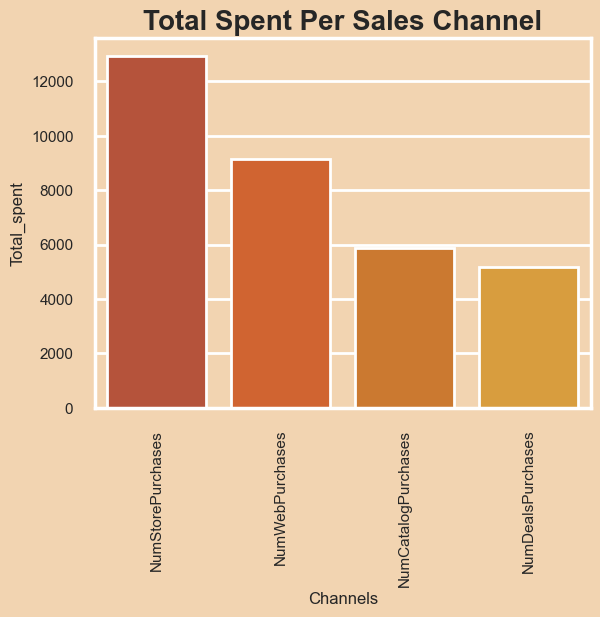

In [38]:
Channels = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
dic= {}

for items in Channels:
    dic[items] = df[items].sum()

df2 = pd.DataFrame.from_dict(dic, orient='Index').reset_index()

df2.columns = ['Channels','Total_spent']

sns.barplot(data=df2.sort_values(by='Total_spent', ascending= False), x='Channels', y='Total_spent', estimator = np.median, palette=palette)
plt.xticks(rotation=90)
plt.title('Total Spent Per Sales Channel', fontsize=20, fontweight='bold')


plt.show()

**Question 3**

Is there a significant correlation between the products and the sales channels? 

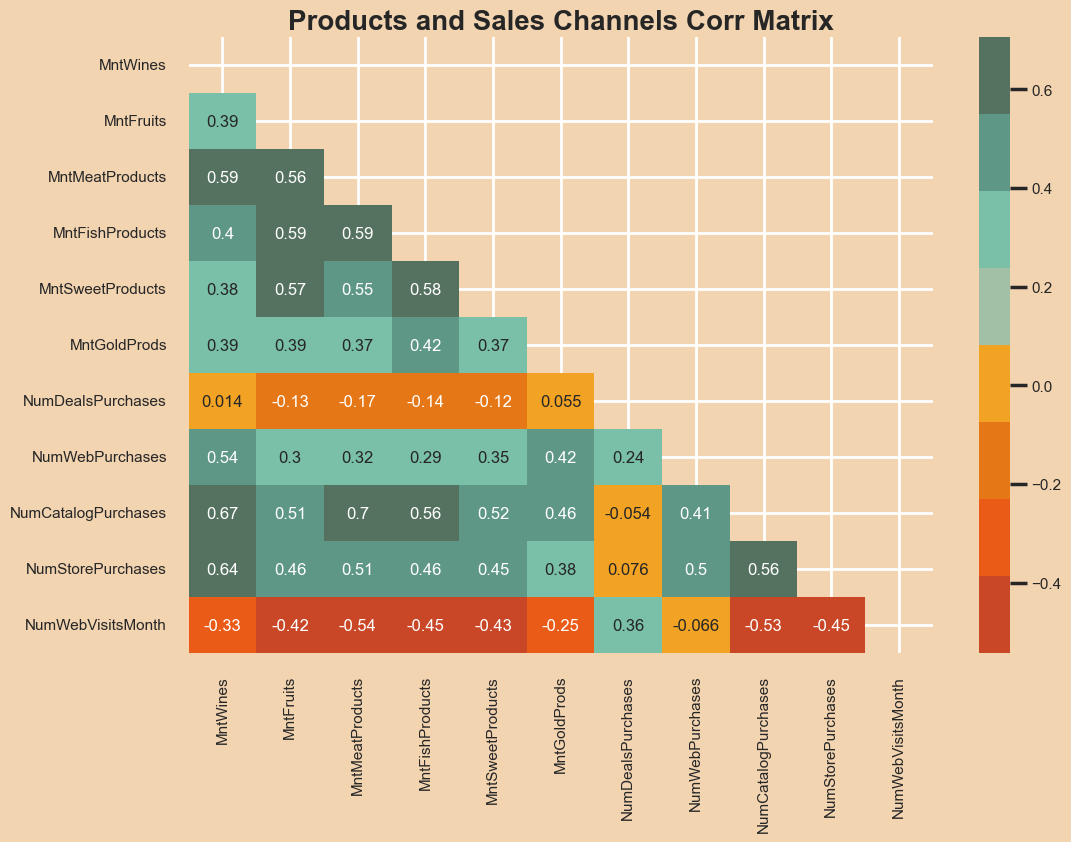

In [39]:
# Carregue seus dados e calcule a matriz de correlação
corr_matrix = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases',
'NumCatalogPurchases',
'NumStorePurchases',
'NumWebVisitsMonth']].corr()

# Crie uma máscara para esconder a metade da matriz de correlação
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Defina o tamanho do gráfico
plt.figure(figsize=(12, 8))
plt.title('Products and Sales Channels Corr Matrix', fontsize=20, fontweight='bold')


# Use o heatmap do Seaborn para plotar a matriz de correlação com a máscara
sns.heatmap(corr_matrix, mask=mask, annot=True,  cmap=palette)

# Exiba o gráfico
plt.show()

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Insights</p>


We can see a significant correlation between wines/meats products and the sales channels such as catalog and in-store purchases, which provide insights to help the company increase revenue.

There are several actions that can be taken based on this information:

   `*Store organization: Presenting these products in a way that makes them more noticeable.`

   `*Promotions: Creating linked promotions between meat products and wines for these sales channels.`

   `*Marketing: Launching marketing campaigns aimed at promoting these products through the catalog and in-store sales channels.`
   
An interesting thing to look at is that the number of web visits is not correlated with the number of web purchases... It makes us raise questions like why our web traffic is not being converted to purchases?

The majority of our revenue comes from wine and meat products, which we observed to have a significant correlation in the previous plots. Additionally, we can see that web purchases have good performance, despite not having a significant correlation with the main products.

**Question 5**

Do our categorical variables have a significant influence on accepting the campaigns?

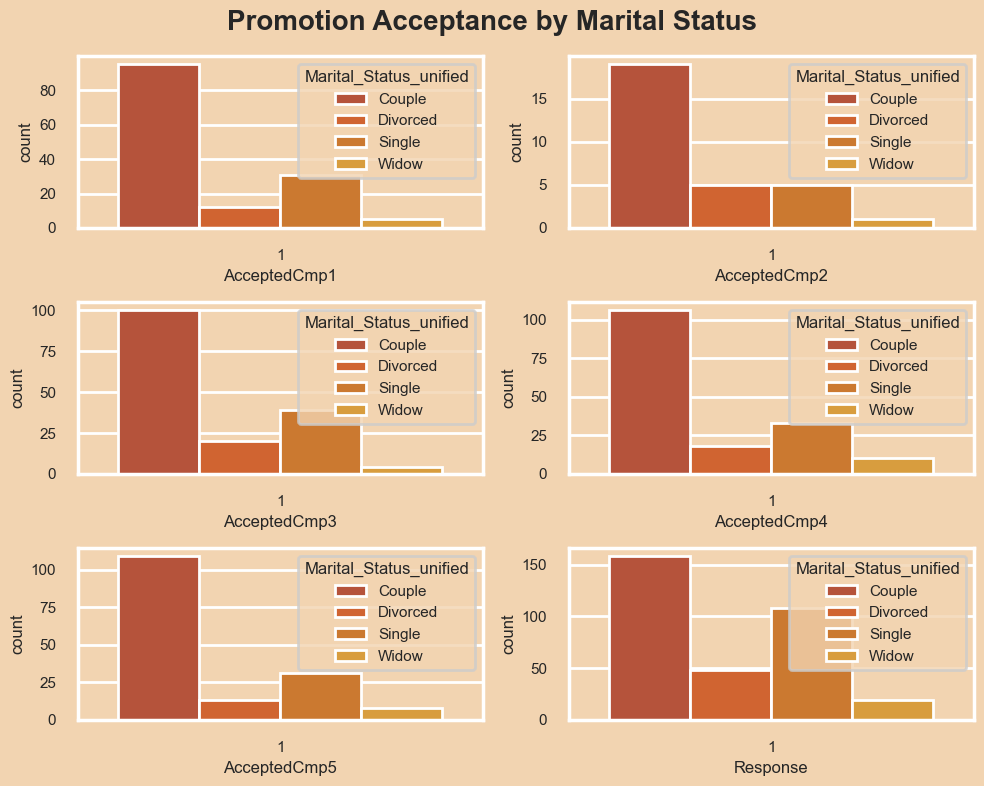

In [40]:
campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

# Plotagem.
plt.figure(figsize=(10, 8))
plt.suptitle('Promotion Acceptance by Marital Status', fontsize=20, fontweight='bold')

for i in range(0, len(campaigns)):
    df2 = df[df[campaigns[i]] == 1]
    count_df2 = df2.groupby([campaigns[i], 'Marital_Status_unified']).size().reset_index(name='count')
    plt.subplot(3, 2, i + 1)
    sns.barplot(x = campaigns[i], y='count', hue='Marital_Status_unified', data=count_df2, palette=palette)
    plt.xlabel(campaigns[i])
    plt.tight_layout()

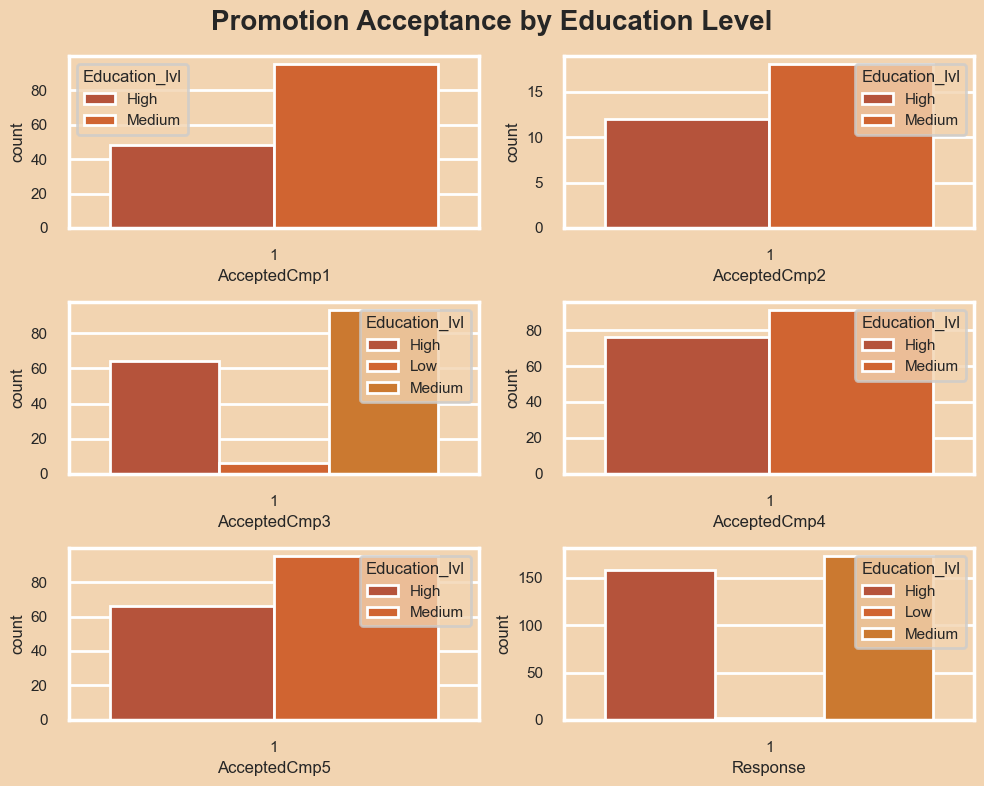

In [41]:
campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

# Plotagem.
plt.figure(figsize=(10, 8))
plt.suptitle('Promotion Acceptance by Education Level', fontsize=20, fontweight='bold')

for i in range(0, len(campaigns)):
    df2 = df[df[campaigns[i]] == 1]
    count_df2 = df2.groupby([campaigns[i], 'Education_lvl']).size().reset_index(name='count')
    plt.subplot(3, 2, i + 1)
    sns.barplot(x = campaigns[i], y='count', hue='Education_lvl', data=count_df2, palette=palette)
    plt.xlabel(campaigns[i])
    plt.tight_layout()

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Insights</p>


Based on the plots below, we can conclude that the campaigns were more accepted by couples and customers with higher levels of education. However, these observations do not provide any actionable insights as they simply reflect the underlying data distribution.


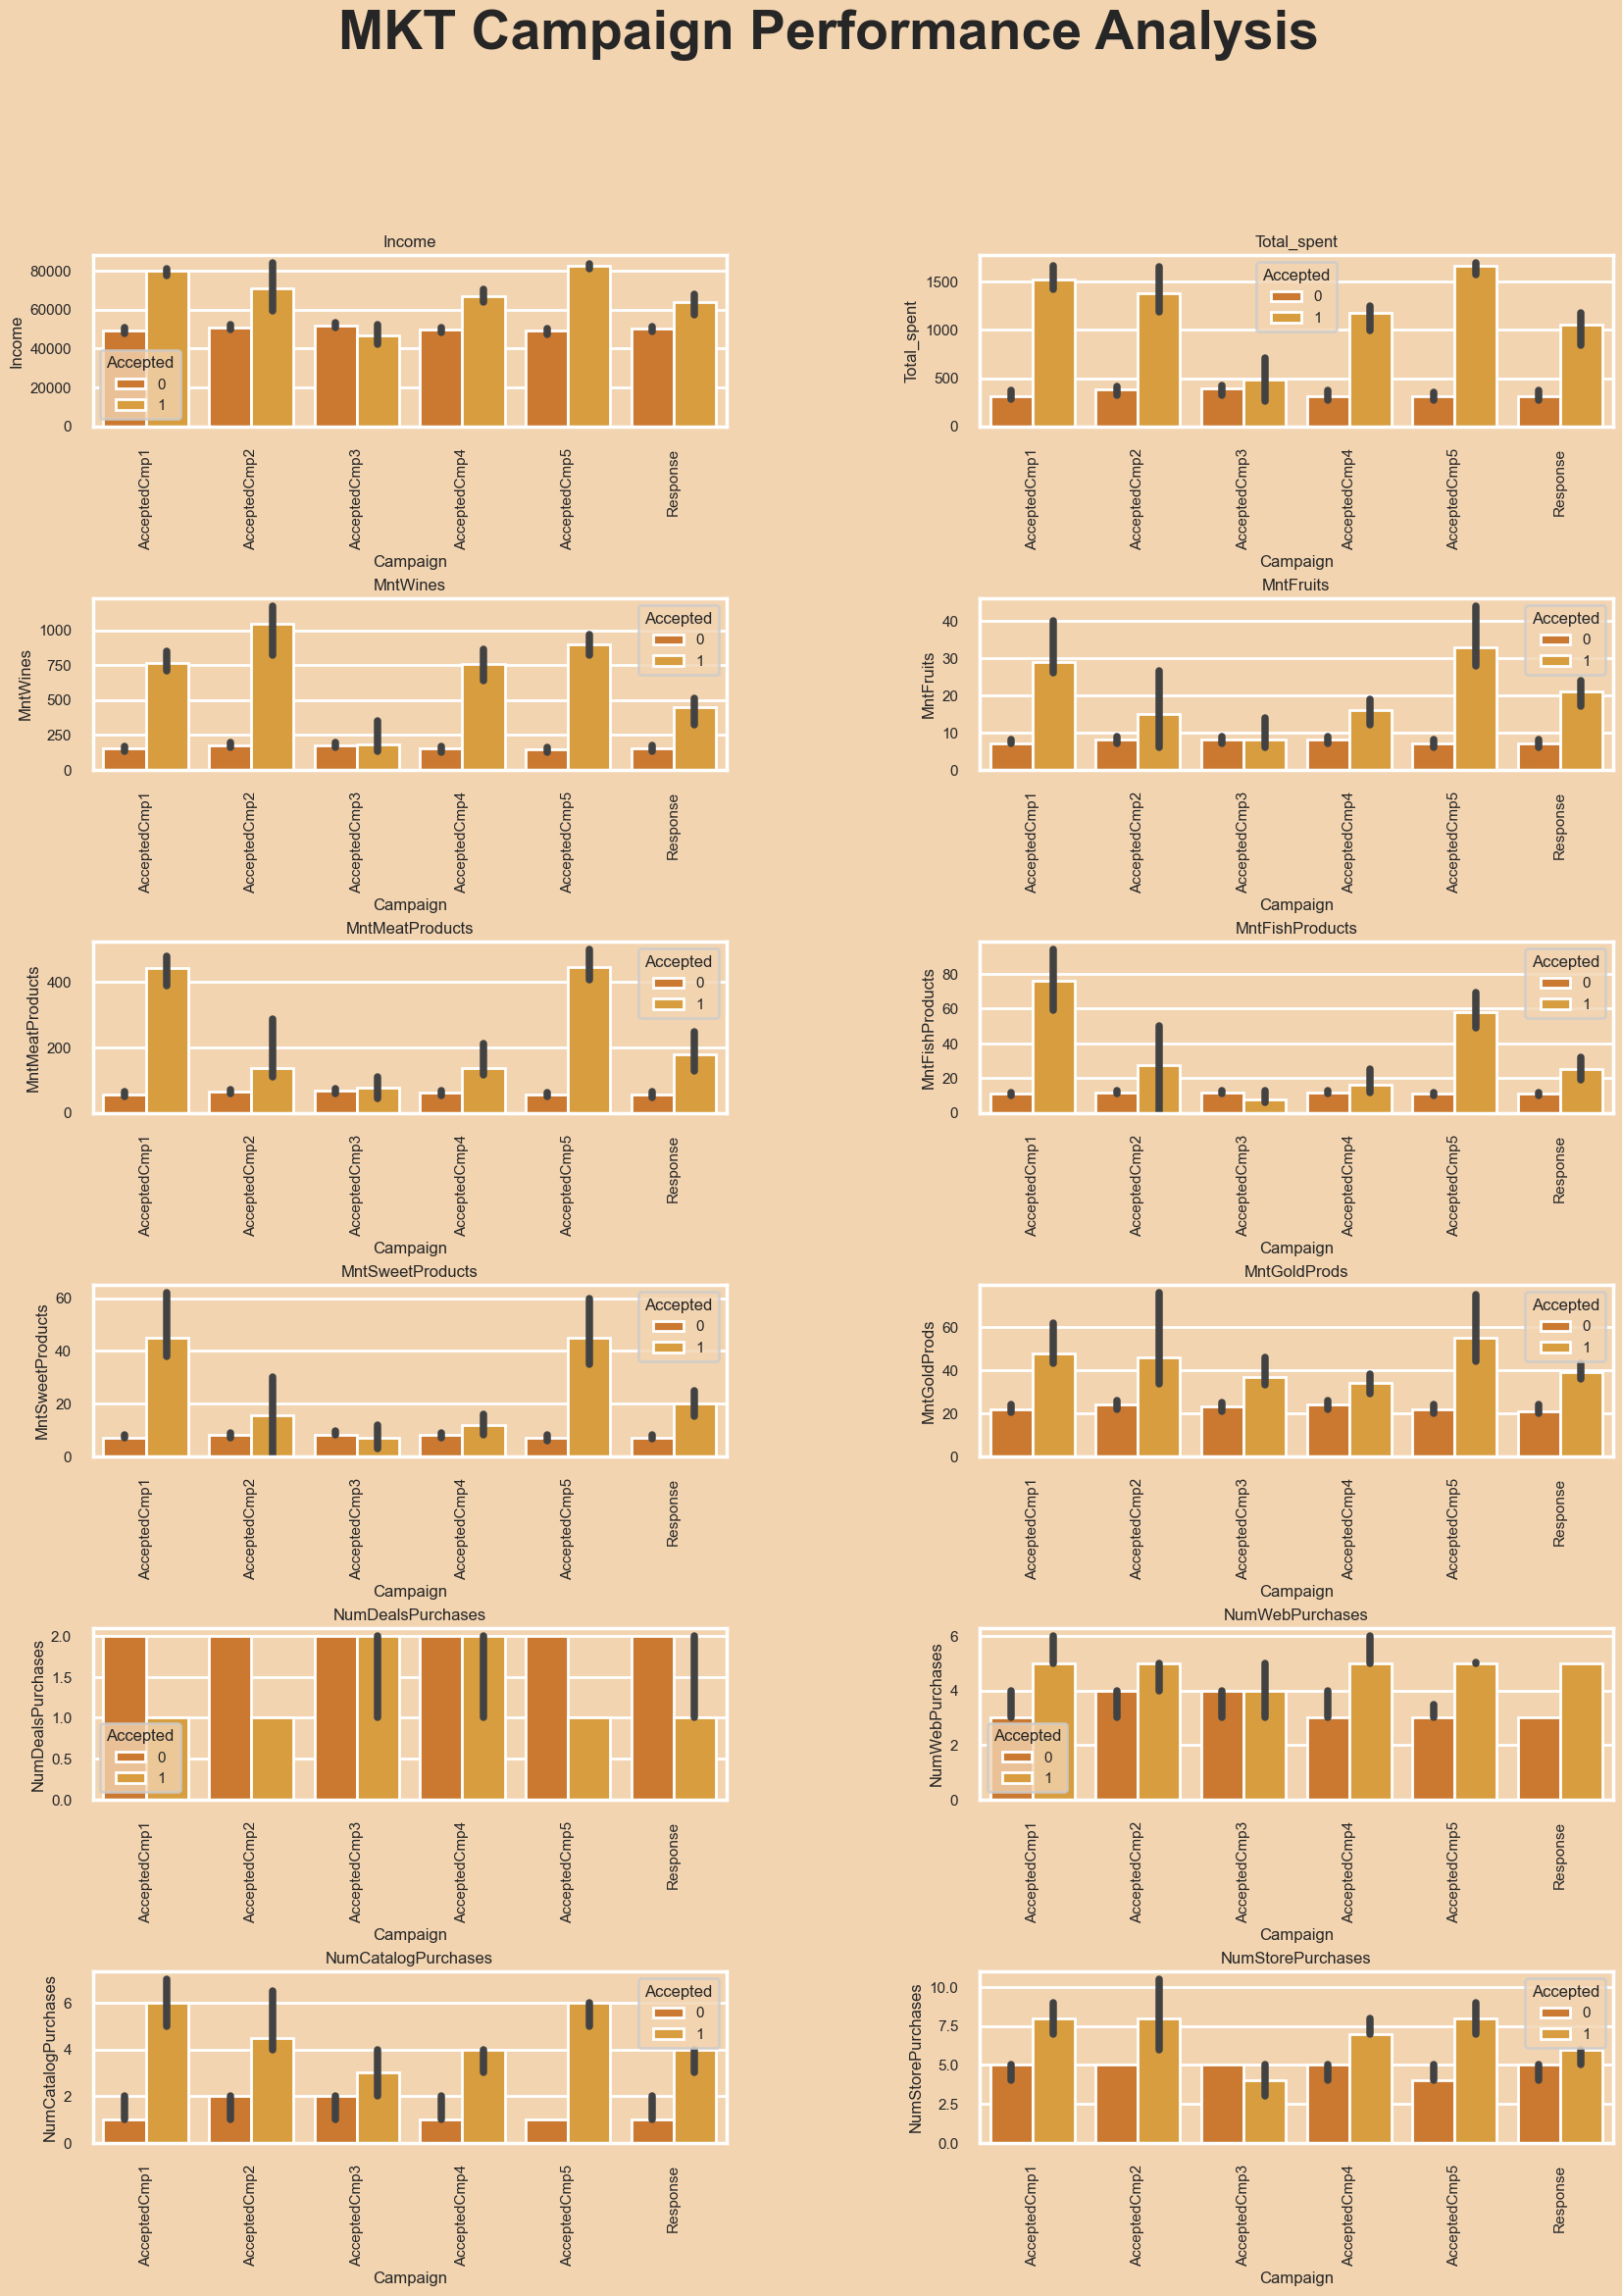

In [42]:
y_axis = ['Income','Total_spent','MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts',       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20, 25))
fig.suptitle('MKT Campaign Performance Analysis', fontsize=40, fontweight='bold')


for i, ax in enumerate(axs.flatten()):
    df_melted = pd.melt(df, id_vars= y_axis[i], value_vars=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response',],
    var_name='Campaign', value_name='Accepted')
    # Plotagem dos dados.
    sns.barplot(x='Campaign', y=y_axis[i], hue='Accepted', data=df_melted,palette=palette[2:4], estimator = np.median ,ax=ax)
    ax.set_title(y_axis[i])
    ax.set_xlabel('Campaign')
    ax.set_ylabel(y_axis[i])
    ax.tick_params(axis='x', labelrotation = 90)

plt.subplots_adjust(wspace=0.4, hspace=1)
plt.show()

To have a better view lets separate our data in two groups, the ones that accepted at least one campaign and the ones who do not.

In [43]:
accepted = []

for item in df['Total_campaignAcc']:
    if item > 0:
        accepted.append('1')
    else:
        accepted.append('0')

df['Accepted'] = accepted


In [44]:
df.groupby('Accepted').agg({'Income':['median','mean','std'],
                           'MntWines':['median','mean','std'],
                           'MntFruits':['median','mean','std'],
                           'MntMeatProducts':['median','mean','std'],
                           'MntFishProducts':['median','mean','std'],
                           'MntSweetProducts':['median','mean','std'],
                           'MntGoldProds':['median','mean','std'],
                           'NumDealsPurchases':['median','mean','std'],
                           'NumWebPurchases':['median','mean','std'],
                           'NumCatalogPurchases':['median','mean','std'],
                           'NumStorePurchases':['median','mean','std'],
                           'NumWebVisitsMonth':['median','mean','std'],
                           'Age':['median','mean','std'],
                           'Total_spent':['median','mean','std']}).T

Accepted                               0             1
Income              median  47025.000000  64497.000000
                    mean    47854.907099  61615.390445
                    std     19000.783527  21366.320919
MntWines            median     99.000000    509.000000
                    mean      217.881481    537.309720
                    std       258.307758    405.336827
MntFruits           median      6.000000     19.000000
                    mean       22.825926     35.558484
                    std        37.092433     44.802568
MntMeatProducts     median     45.000000    161.000000
                    mean      123.221605    277.057661
                    std       176.137530    276.690648
MntFishProducts     median     10.000000     23.000000
                    mean       32.137037     51.782537
                    std        49.894017     63.052800
MntSweetProducts    median      7.000000     18.000000
                    mean       23.061111     38.093904
                    std        37.940845     47.637549
MntGoldProds        median     18.000000     38.000000
                    mean       38.047531     59.774300
                    std        48.278527     57.579219
NumDealsPurchases   median      2.000000      1.000000
                    mean        2.356790      2.222405
                    std         1.882230      1.929866
NumWebPurchases     median      3.000000      5.000000
                    mean        3.738889      5.065898
                    std         2.761528      2.581146
NumCatalogPurchases median      1.000000      4.000000
                    mean        2.076543      4.115321
                    std         2.534811      2.907237
NumStorePurchases   median      4.000000      6.000000
                    mean        5.511111      6.614498
                    std         3.182798      3.269974
NumWebVisitsMonth   median      6.000000      5.000000
                    mean        5.446296      5.047776
                    std         2.338592      2.581866
Age                 median     50.000000     51.000000
                    mean       50.885802     51.733114
                    std        11.478634     12.255582
Total_spent         median    235.000000   1029.000000
                    mean      457.174691    999.576606
                    std       491.550462    683.444699

<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Insights</p>


Customers who accepted promotions have higher incomes.

Customers who spend more on wine and meat tend to have a higher acceptance rate.

Promotions were more accepted by clients who prefer catalog and web purchases.

Despite the poor performance of Campaign 3, this promotion seems to have attracted the largest customer profile in our dataset. This promotion is worth reviewing, as it could attract even more customers based on the profile of those who accepted it.

Customers who accept our promotions tend to spend more. The company can consider developing a loyalty program to encourage customers who already participate in promotions to continue, and to encourage those who do not to start.


<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Clustering</p>


In [45]:
df_enc = df.copy()

In [46]:
#Lets transform the Education LVL variable to numeric.

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

array = ordinal_encoder.fit_transform(df_enc['Education_lvl'].values.reshape(-1,1))

df_enc['Education_lvl'] = array

In [47]:
df_enc.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Education_lvl',
       'Total_spent', 'Acc_Age', 'Marital_Status_unified', 'NumOfPurchases',
       'Age_group', 'Total_campaignAcc', 'Accepted'],
      dtype='object')

In [48]:
df_enc.drop(['Year_Birth','Marital_Status','Dt_Customer','Marital_Status_unified','Education',
                      'Age_group'], axis=1, inplace=True)

#df_enc.drop(['ID','Year_Birth','Marital_Status','Dt_Customer','Marital_Status_unified','Education',
#                       'Age_group','MntWines', 'MntFruits',
#       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
#       'MntGoldProds'], axis=1, inplace=True)

In [49]:
df_enc.shape

(2227, 29)

**Normalazing the data**

In [50]:
from sklearn.preprocessing import StandardScaler

df_enc_norm = StandardScaler().fit_transform(df_enc)

df_enc_scaled= pd.DataFrame(df_enc_norm, columns= df_enc.columns)
df_enc_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education_lvl,Total_spent,Acc_Age,NumOfPurchases,Total_campaignAcc,Accepted
0,0.317158,-0.826216,-0.932458,0.307304,0.979922,1.553024,1.736896,2.468924,1.471805,0.848905,0.358675,1.404696,2.638901,-0.558736,0.688978,-0.281021,-0.284724,-0.279157,-0.26195,-0.116855,-0.095195,2.384887,1.015993,-0.677005,1.684092,1.026853,1.316696,0.620110,1.633666
1,-0.255452,1.030477,0.903602,-0.383486,-0.872719,-0.636686,-0.725827,-0.651456,-0.632796,-0.732049,-0.168914,-1.116931,-0.584618,-1.175493,-0.139955,-0.281021,-0.284724,-0.279157,-0.26195,-0.116855,-0.095195,-0.419307,1.272487,-0.677005,-0.961899,-0.973849,-1.189885,-0.502642,-0.612120
2,0.971382,-0.826216,-0.932458,-0.797960,0.359406,0.571430,-0.173995,1.349258,-0.148979,-0.037971,-0.696502,1.404696,-0.226449,1.291533,-0.554421,-0.281021,-0.284724,-0.279157,-0.26195,-0.116855,-0.095195,-0.419307,0.332010,-0.677005,0.284546,-0.973849,1.038187,-0.502642,-0.612120
3,-1.211809,1.030477,-0.932458,-0.797960,-0.872719,-0.561179,-0.661979,-0.504615,-0.584414,-0.751328,-0.168914,-0.756699,-0.942786,-0.558736,0.274512,-0.281021,-0.284724,-0.279157,-0.26195,-0.116855,-0.095195,-0.419307,-1.292450,-0.677005,-0.918631,-0.973849,-0.911376,-0.502642,-0.612120
4,0.324684,1.030477,-0.932458,1.550726,-0.391745,0.420415,-0.215040,0.156172,-0.003834,-0.558529,1.413852,0.323999,0.131720,0.058020,-0.139955,-0.281021,-0.284724,-0.279157,-0.26195,-0.116855,-0.095195,-0.419307,-1.035957,1.219461,-0.304562,-0.973849,0.202660,-0.502642,-0.612120


<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">K Means Clustering without Dimensionality Reduction</p>


**Identifying the ideal number of clusters**

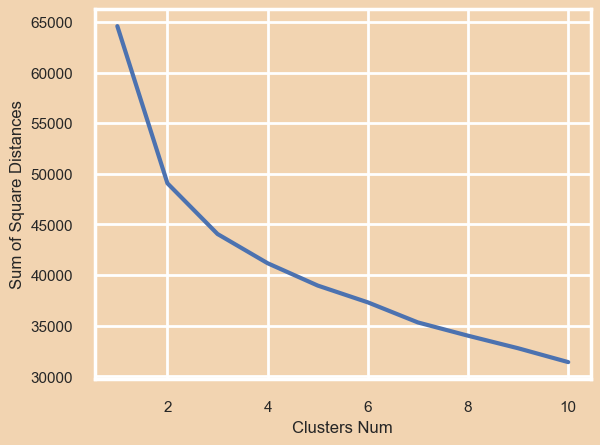

In [51]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_enc_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Clusters Num')
plt.ylabel('Sum of Square Distances')
plt.show()

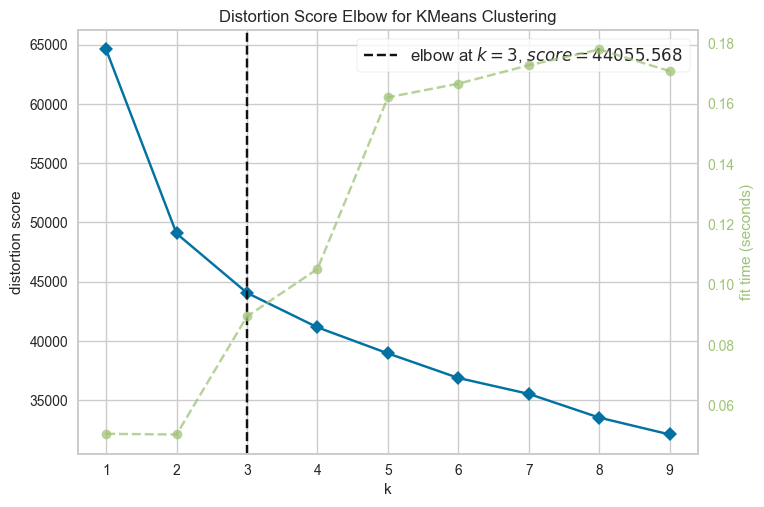

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_enc_scaled)        # Fit the data to the visualizer
visualizer.show()

**Ideal number of clusters = 3**

In [53]:
km= KMeans(n_clusters=3, init='k-means++',
            n_init=10, max_iter=100, random_state=0)

km.fit(df_enc_scaled)

df["cluster_km_orig"] = km.labels_

km.labels_

array([2, 0, 1, ..., 1, 1, 0], dtype=int32)

**Evaluating the model**

In [54]:
from sklearn.metrics import silhouette_score
sc= silhouette_score(df_enc_scaled, km.labels_)
print (f"Silhoutte Score is: {sc}")

Silhoutte Score is: 0.22149767133501388


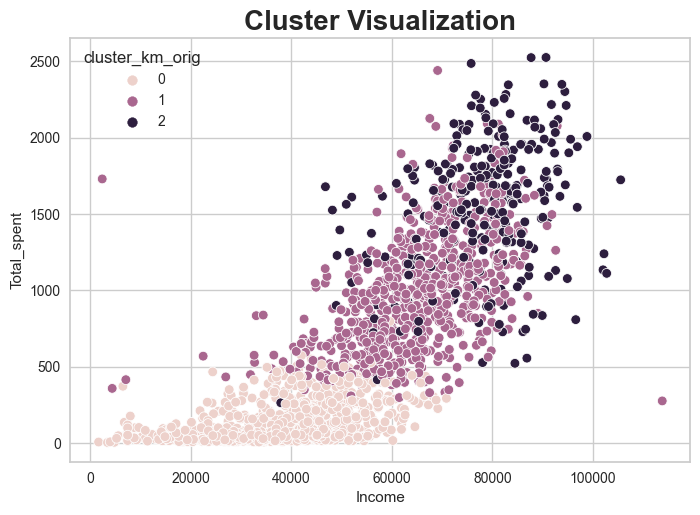

In [55]:
sns.scatterplot(x=df['Income'],y=df['Total_spent'], hue=df['cluster_km_orig'])
plt.title('Cluster Visualization', fontsize=20, fontweight='bold')


plt.show()


<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">K Means Clustering with Dimensionality Reduction PCA</p>


In [56]:
from sklearn.decomposition import PCA

pca = PCA()
_ = pca.fit_transform(df_enc_scaled)
PC_components = np.arange(pca.n_components_) + 1

**Understanding the variance of our features**

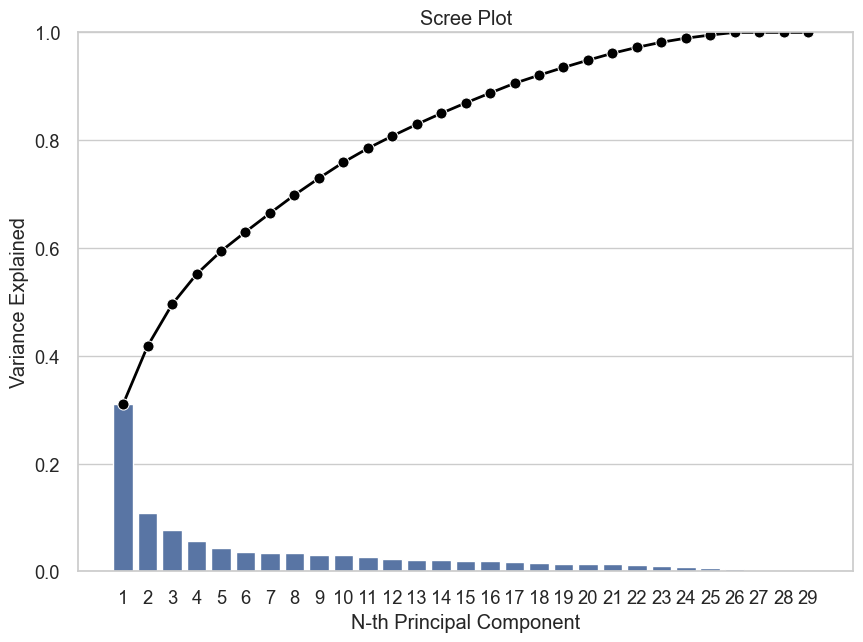

In [57]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

## PCA with 3 components

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(df_enc_scaled)
PCA_df = pd.DataFrame(pca.transform(df_enc_scaled), columns=(["col1","col2",'col3']))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2227.0,-1.152598e-16,3.000733,-5.439600,-2.743856,-0.777316,2.312945,9.510525
col2,2227.0,-3.370053e-17,1.767483,-3.519292,-1.216636,-0.073925,0.522592,8.080343
col3,2227.0,-3.409935e-17,1.496493,-3.899790,-1.154067,-0.222692,0.999615,5.459428


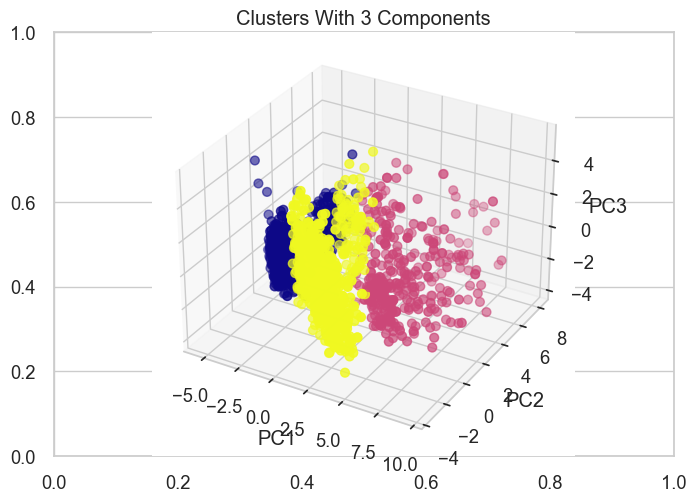

In [59]:
#Clustering the new reduced DF

km= KMeans(n_clusters=3, init='k-means++',
            n_init=10, max_iter=100, random_state=0)

km.fit(PCA_df)

from mpl_toolkits.mplot3d import Axes3D

#Plotting the clusters
fig = plt.figure()
plt.title('Clusters With 3 Components')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_df['col1'], PCA_df['col2'], PCA_df['col3'], s=40, c= km.labels_, marker='o' ,cmap = 'plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [60]:
from sklearn.metrics import silhouette_score
#Evaluating the cluster
sc= silhouette_score(PCA_df, km.labels_)
print (f"Silhoutte Score is: {sc}")

Silhoutte Score is: 0.44788360684314177


In [61]:
df['cluster_km_orig_pca3'] = km.labels_

## PCA with 2 Components

In [62]:
pca = PCA(n_components=2)

pca.fit(df_enc_scaled)
PCA_df = pd.DataFrame(pca.transform(df_enc_scaled), columns=(["col1","col2"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2227.0,-1.108727e-16,3.000733,-5.439598,-2.743856,-0.777317,2.312943,9.510526
col2,2227.0,4.147757e-17,1.767483,-3.519583,-1.216713,-0.073939,0.522732,8.078884


In [63]:
km= KMeans(n_clusters=3, init='k-means++',
            n_init=10, max_iter=100, random_state=42)

km.fit(PCA_df)

df['cluster_km_orig_pca2'] = km.labels_

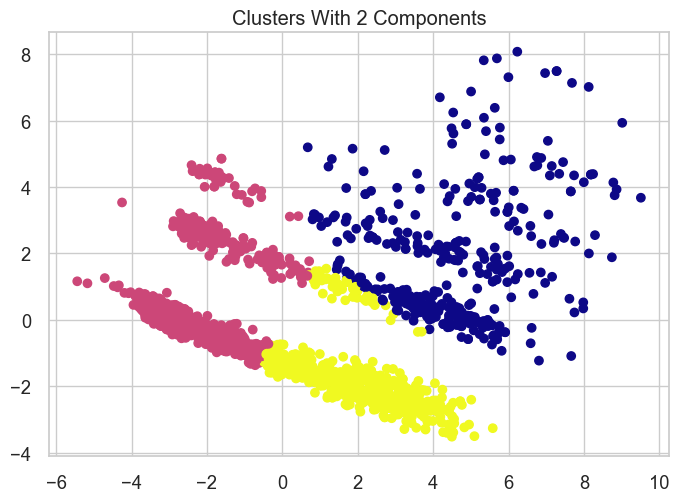

In [64]:
plt.scatter(x=PCA_df['col1'], y=PCA_df['col2'], c=km.labels_,cmap='plasma' )
plt.title('Clusters With 2 Components')

plt.show()

In [65]:
sc= silhouette_score(PCA_df, km.labels_)
print (f"Silhoutte Score is: {sc}")

Silhoutte Score is: 0.5476336370302299



<p style="padding:10px;background-color:#A6AFAB;margin:0;color:#111423;font-family:Arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Insights</p>

**We could notice that with the dimensionality redution for two componentes raised our Silhouete score significantly, therefore let's use this to visualize the clusters and try to understand each cluster caracteristics.**

**Let's plot the Clusters Distribution**

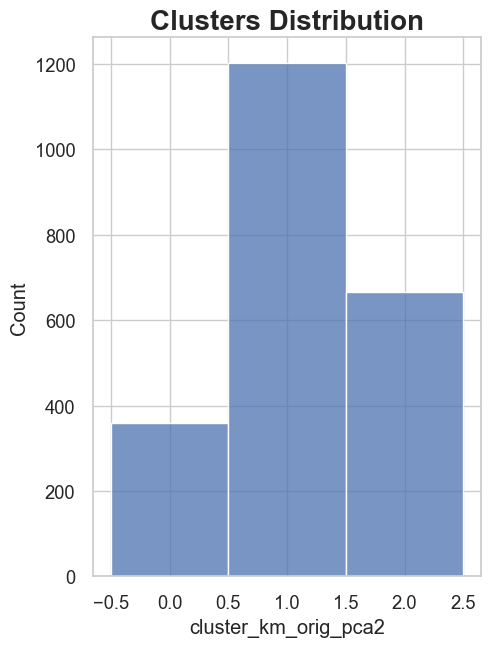

In [66]:
plt.figure(figsize=(5,7))
plt.title('Clusters Distribution', fontsize=20, fontweight='bold')

bins = np.array([-0.5, 0.5, 1.5, 2.5])
sns.histplot(df['cluster_km_orig_pca2'],bins=bins)
plt.show()

**Let's vizualise the spending profile of each cluster**

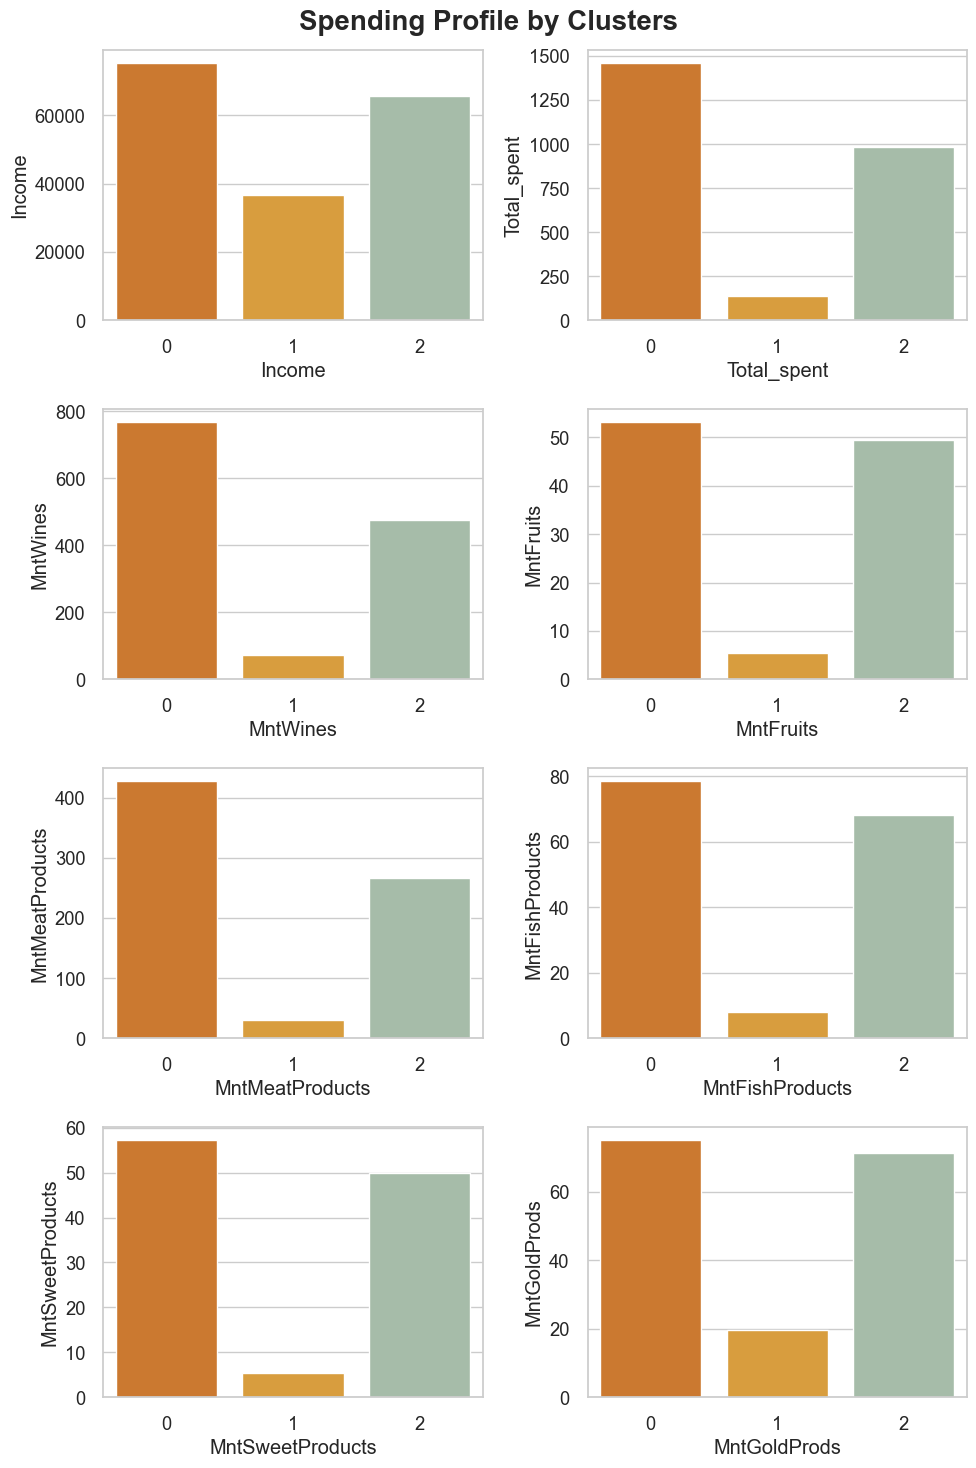

In [67]:
df_clusters_grouped = df.groupby('cluster_km_orig_pca2').mean()

features = ['Income','Total_spent','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

# Plotagem.
plt.figure(figsize=(10,15))
plt.suptitle('Spending Profile by Clusters', fontsize=20, fontweight='bold')

for i in range(0, len(features)):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x =df_clusters_grouped.index , y=df_clusters_grouped[features[i]], palette=palette[2:])
    plt.xlabel(features[i])
    plt.tight_layout()

**Sales channel preference**

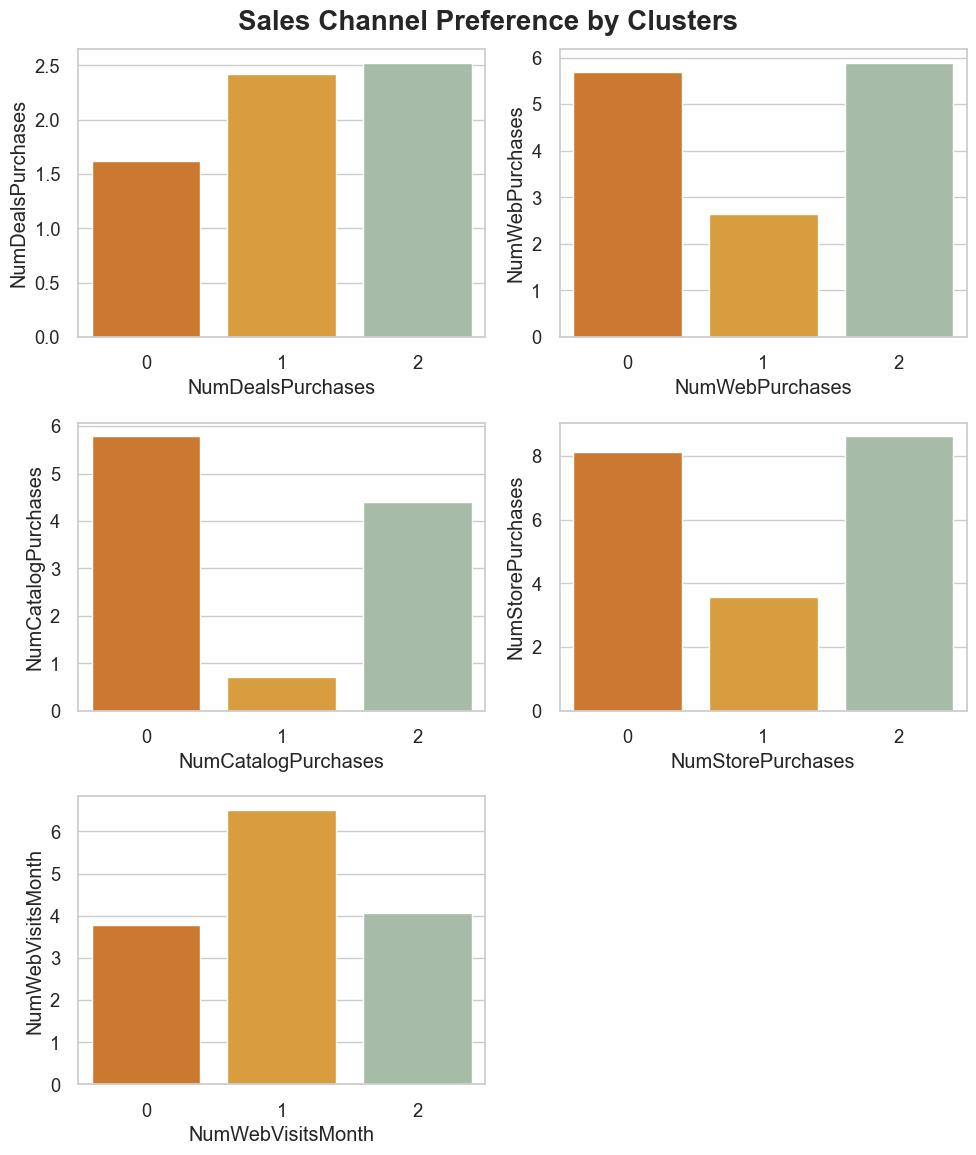

In [68]:
features = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Plotagem.
plt.figure(figsize=(10,15))
plt.suptitle('Sales Channel Preference by Clusters', fontsize=20, fontweight='bold')

for i in range(0, len(features)):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x =df_clusters_grouped.index , y=df_clusters_grouped[features[i]], palette=palette[2:])
    plt.xlabel(features[i])
    plt.tight_layout()

In [70]:
df_clusters_grouped.T

cluster_km_orig_pca2,0,1,2
Year_Birth,1967.699164,1970.658070,1966.318318
Income,75408.309192,36672.725874,65725.663664
Kidhome,0.050139,0.746256,0.114114
Teenhome,0.256267,0.521631,0.618619
Recency,45.986072,48.682196,51.542042
MntWines,768.883008,71.839434,475.578078
MntFruits,53.239554,5.437604,49.418919
MntMeatProducts,428.311978,30.188852,266.879880
MntFishProducts,78.682451,8.186356,68.178679
MntSweetProducts,57.303621,5.498336,50.001502


**Let's see the promo acceptance rate of each cluster**

In [72]:
df_GroupAcceptance_rate ={}
campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

for i in range(3):
    for item in campaigns:
        df[df['cluster_km_orig_pca2'] == i][item].value_counts()/ df[df['cluster_km_orig_pca2'] == i].shape[0]
        df_GroupAcceptance_rate[f'{item}_Cluster_{i}'] = df[df['cluster_km_orig_pca2'] == i][item].value_counts()/ df[df['cluster_km_orig_pca2'] == i].shape[0]

In [74]:
df_accrate = pd.DataFrame(df_GroupAcceptance_rate)

In [75]:
df_accrate.fillna(0, inplace=True)

df_accrate


,AcceptedCmp1_Cluster_0,AcceptedCmp2_Cluster_0,AcceptedCmp3_Cluster_0,AcceptedCmp4_Cluster_0,AcceptedCmp5_Cluster_0,Response_Cluster_0,AcceptedCmp1_Cluster_1,AcceptedCmp2_Cluster_1,AcceptedCmp3_Cluster_1,AcceptedCmp4_Cluster_1,AcceptedCmp5_Cluster_1,Response_Cluster_1,AcceptedCmp1_Cluster_2,AcceptedCmp2_Cluster_2,AcceptedCmp3_Cluster_2,AcceptedCmp4_Cluster_2,AcceptedCmp5_Cluster_2,Response_Cluster_2
0,0.618384,0.922006,0.821727,0.67688,0.551532,0.423398,0.996672,0.998336,0.929285,0.977537,1.0,0.90599,0.996997,1.0,0.978979,0.963964,1.0,0.98048
1,0.381616,0.077994,0.178273,0.32312,0.448468,0.576602,0.003328,0.001664,0.070715,0.022463,0.0,0.09401,0.003003,0.0,0.021021,0.036036,0.0,0.01952


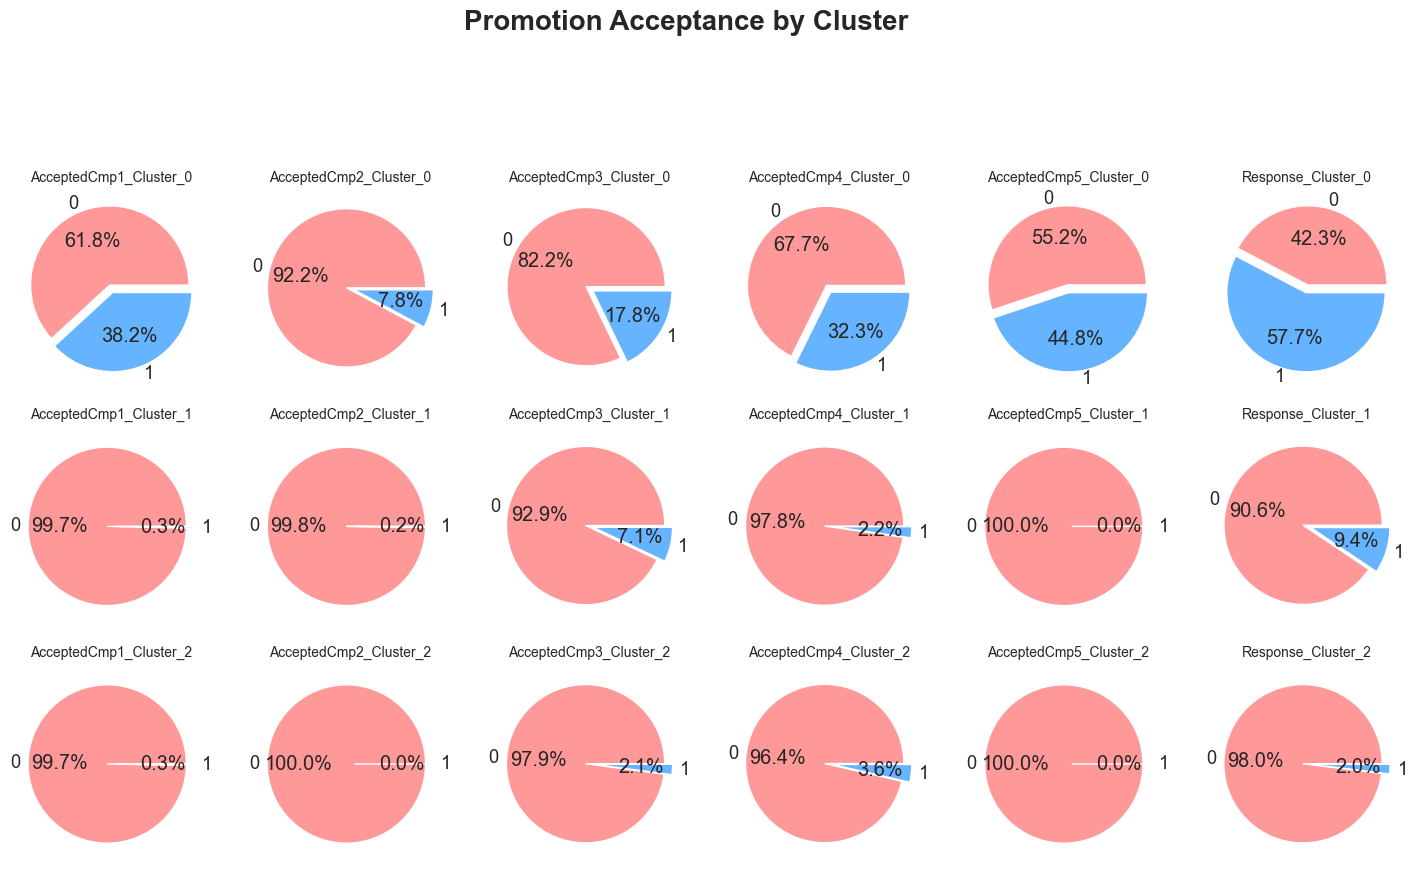

In [78]:
cols = df_accrate.columns

colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0.05)

plt.figure(figsize=(18, 18))
plt.suptitle('Promotion Acceptance by Cluster', fontsize=20, fontweight='bold')

for i in range(len(cols)):
    plt.subplot(6, 6, i + 1)
    plt.pie(df_accrate[cols[i]],explode=explode, colors=colors, labels=['0', '1'], autopct='%1.1f%%',)
    plt.title(cols[i], fontdict= {'fontsize': '10'})

**Conclusion**

In conclusion, the clustering analysis helped us identify the groups of customers that are more likely to respond positively to our promotion campaigns, as well as gain a better understanding of our customers' overall profiles. This information will be highly valuable for our marketing team to tailor their campaigns to each group's spending and behavioral patterns, ultimately resulting in improved campaign performance and customer engagement.